What were your thoughts when you first saw this problem? As soon as I saw this problem, I was very frustrated because there were so many features. **Really, should I be a real estate agent?**
If I have domain knowledge about real estate, I will be able to select important features as soon as I see them. However, I have no such knowledge. Therefore, I tried to visualize it as much as possible and gain insight through various methods as much as possible. However, EDA work was difficult in the absence of domain knowledge.

I tried to write a notebook without a logical leap as much as possible. In addition, we tried to present the reasons for a certain decision as much as possible. For that reason, the notebook may be a little long, so please understand.

# Setting up

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from matplotlib import rcParams
from sklearn.preprocessing import QuantileTransformer

In [77]:
house_df = pd.read_csv("re_train.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


--------------------------------------------------------------
## Utility Functions

In [78]:
def outlier_iqr(data):
    q1,q3 = np.percentile(data,[25,75])
    iqr = q3-q1
    lower = q1-(iqr*2)
    upper = q3+(iqr*2)
    return np.where((data>upper)|(data<lower))

--------------------------------------------------
# EDA

Look at what the data is a bit. 

In [80]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<span style="color:Blue"> Observation:
    
**Oh my god!. 81 features!**

In [11]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


Id feature is simply unique ID, so it is not helpful for learning. Let's remove it.

In [81]:
house_df.drop('Id',axis=1,inplace=True,errors='ignore')

In [82]:
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


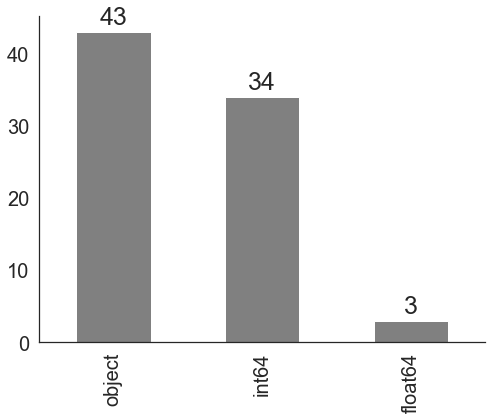

In [83]:
plt.figure(figsize = (8,6))
ax = house_df.dtypes.value_counts().plot(kind='bar',grid = False,fontsize=20,color='grey')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 1, height, ha = 'center', size = 25)
sns.despine()

<span style="color:Blue"> Observation:

There are 37 numerical features and 43 object (string) types.
Among the numeric features, 25 are int types and 12 are float types.
There must be a reason for using a different type like this. Let's check some more.

# Categorizing Columns

In [84]:
# "Cardinality" meancategorical_colss the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in house_df.loc[:,:'SaleCondition'].columns if
                    house_df[cname].nunique() < 10 and 
                    house_df[cname].dtype == "object"]

# Select numerical columns
int_cols = [cname for cname in house_df.loc[:,:'SaleCondition'].columns if 
                house_df[cname].dtype in ['int64']]
float_cols = [cname for cname in house_df.loc[:,:'SaleCondition'].columns if 
                house_df[cname].dtype in ['float64']]

numerical_cols = int_cols + float_cols

# Keep selected columns only
my_cols = categorical_cols + numerical_cols

## Checking Missing Values

In [86]:
pd.set_option('display.max_rows', None)
house_df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
MSSubClass          0
Fireplaces          0
Functional          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
CentralAir

We have a lot of varaibles, several of them have many missing values. Here we can do two things:
<ul>
<li>Get rid of some columns that have many missing values. 
<li>Cut out some columns to make the data more manageable. We are mainly doing this to make the example something that is practical to deal with. If this was a real scenario, we'd keep them, but that'll make this example just too long without really adding anything new. Next semester we'll look at other ways to manage large numbers of columns. 
</ul>

## Drop Very Empty Columns

In [93]:
emptCol = house_df.columns[house_df.isnull().sum()>80]
emptCol

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [18]:
house_df = house_df.drop(columns={'PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageYrBlt'})

In [20]:
house_df[['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PoolQC       10 non-null     object
 1   MiscFeature  105 non-null    object
 2   Alley        198 non-null    object
 3   Fence        571 non-null    object
 4   FireplaceQu  1499 non-null   object
dtypes: object(5)
memory usage: 114.1+ KB


<span style="color:Blue"> Observation:
    
PoolQC, MiscFeature, Alley, Fence, and FireplaceQu features have too many missing values.

Deleting those features may be the easiest way. However, a lot of thought must be taken into account when removing missing values. When data is written, it can have some intent. These are categorical features, so we'll think about them again later.

<span style="color:Blue"> Observation:
    
* Garage-related features have 157 to 159 missing values. It is unknown whether the houses lacked garages or were intentionally omitted.
* Basement-related features also have 79 to 82 missing values.

It seems that we need to focus more on the process of filling in the missing values ​​of the corresponding Garage and Basement features.

----------------------------------------------------------
# Checking Target

The problem is a regression problem. Therefore, we analyze the distribution of the target and check whether there is necessary preprocessing based on this. If it is a classification problem
We need to check target imbalance.

In [22]:
#Create a duplicate Sales Price that we cna play with
house_df['SalePriceCpy'] = house_df['SalePrice'].copy()

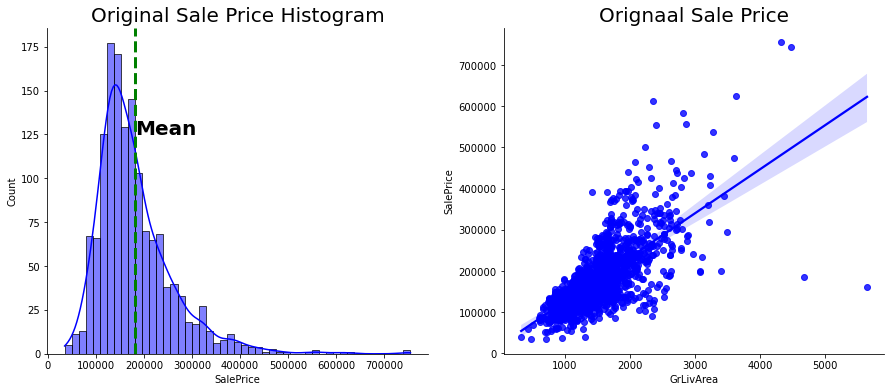

In [23]:
plt.figure(figsize = (15,6))
ax1 = plt.subplot(1,2,1)
sns.histplot(house_df['SalePrice'],color='Blue',kde=True)
plt.axvline(x=house_df['SalePrice'].mean(), color='g', linestyle='--', linewidth=3)
plt.text(house_df['SalePrice'].mean(), 125, "Mean", horizontalalignment='left', size=20, color='black', weight='semibold')
plt.title('Original Sale Price Histogram',fontsize=20)
ax2 = plt.subplot(1,2,2)
sns.regplot(data=house_df, y="SalePrice", x="GrLivArea",ax=ax2,color='Blue')
ax2.set_title('Orignaal Sale Price',fontsize=20)
sns.despine()

In [24]:
mean = house_df['SalePrice'].mean()
std = house_df['SalePrice'].std()
skew = house_df['SalePrice'].skew()
print('SalePrice : mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}'.format(mean, std, skew))

SalePrice : mean: 180921.1959, std: 79442.5029, skew: 1.8829


<span style="color:Blue"> Observation:

The skewness was about 1.88. Also, since the metric is RMSLE, we will perform log scaling.

In [25]:
house_df['SalePriceCpy'] = np.log1p(house_df['SalePrice'])

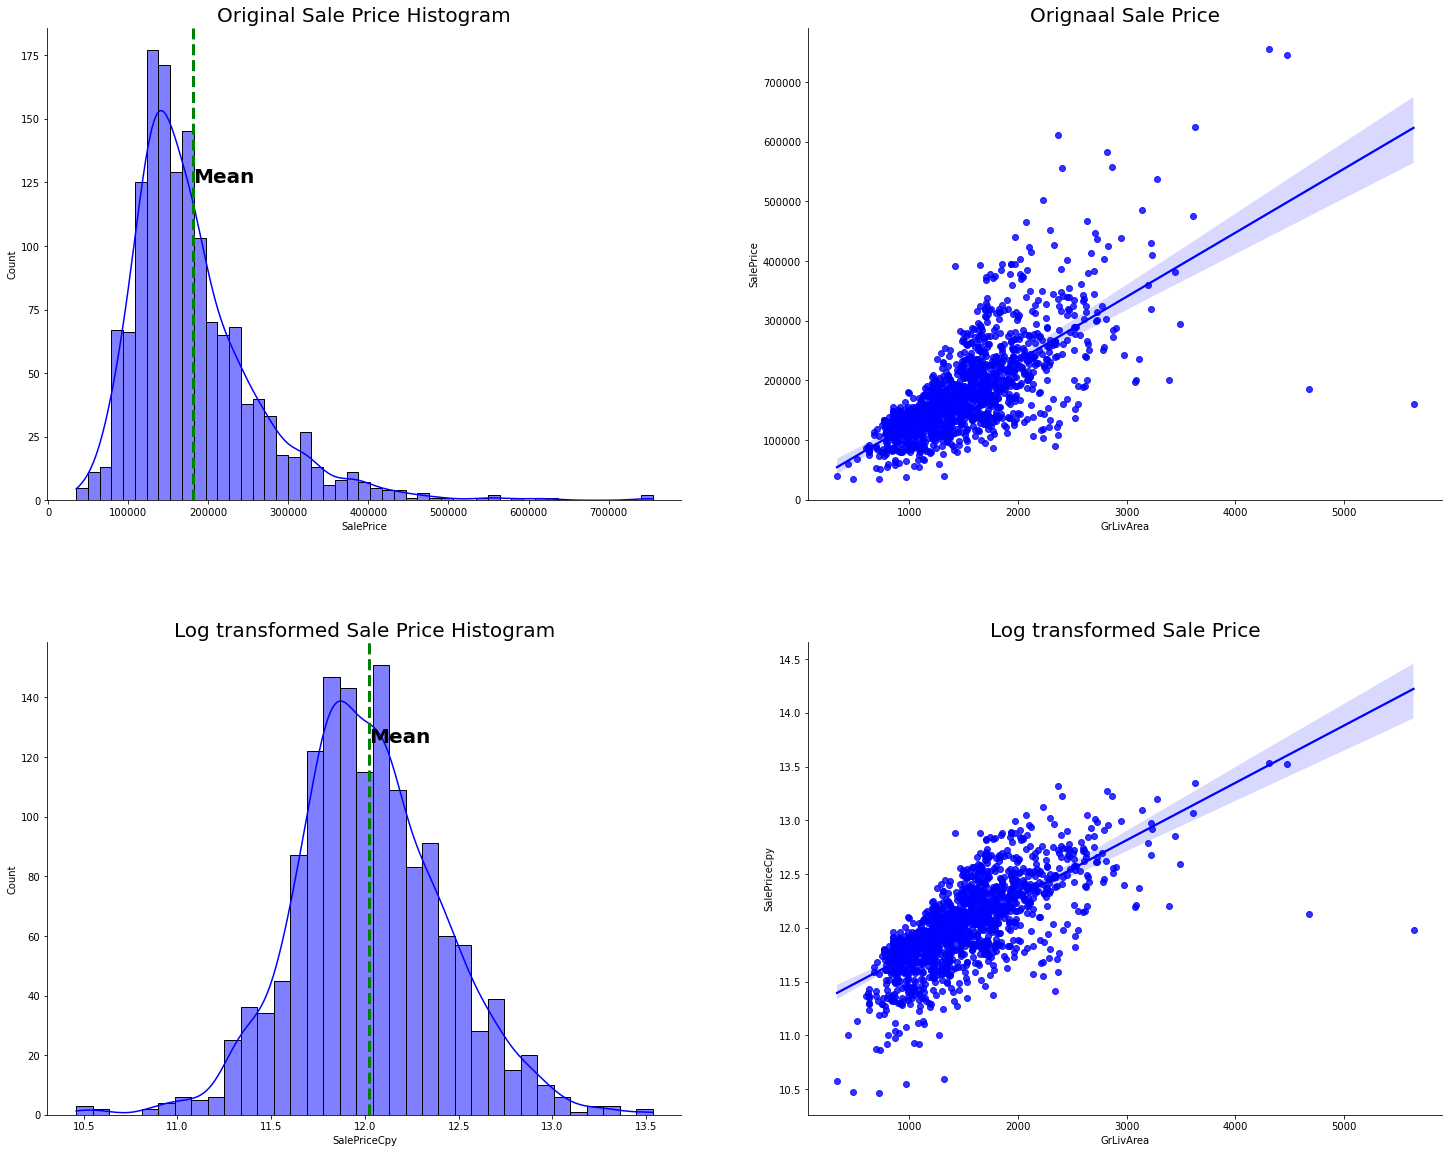

In [26]:
plt.figure(figsize = (25,20))
plt.subplots_adjust(hspace=0.3)
ax1 = plt.subplot(2,2,1)
sns.histplot(house_df['SalePrice'],color='Blue',kde=True)
plt.axvline(x=house_df['SalePrice'].mean(), color='g', linestyle='--', linewidth=3)
plt.text(house_df['SalePrice'].mean(), 125, "Mean", horizontalalignment='left', size=20, color='black', weight='semibold')
plt.title('Original Sale Price Histogram',fontsize=20)
ax2 = plt.subplot(2,2,2)
sns.regplot(data=house_df, y="SalePrice", x="GrLivArea",ax=ax2,color='Blue')
ax2.set_title('Orignaal Sale Price',fontsize=20)
ax3 = plt.subplot(2,2,3)
sns.histplot(house_df['SalePriceCpy'],color='Blue',kde=True)
plt.axvline(x=house_df['SalePriceCpy'].mean(), color='g', linestyle='--', linewidth=3)
plt.text(house_df['SalePriceCpy'].mean(), 125, "Mean", horizontalalignment='left', size=20, color='black', weight='semibold')
plt.title('Log transformed Sale Price Histogram',fontsize=20)
ax4 = plt.subplot(2,2,4)
sns.regplot(data=house_df, y="SalePriceCpy", x="GrLivArea",ax=ax4,color='Blue')
ax4.set_title('Log transformed Sale Price',fontsize=20)
sns.despine()

> Logarithm function increases the spacing between small numbers and reduces the spacing between large numbers. When certain features are dense with values in small values, by increasing these intervals, our models increase the intervals for small values, and we can improve the performance of the model when training and testing using these values.

Ref: https://www.kaggle.com/ohseokkim/preprocessing-linear-nonlinear-scaling

<span style="color:Blue"> Observation:
    
If you look at the regression plot between GrLivArea and SalePrice, you can see that a clearer regression line is drawn after conversion. Log transform will definitely help with learning.

In [27]:
mean = house_df['SalePriceCpy'].mean()
std = house_df['SalePriceCpy'].std()
skew = house_df['SalePriceCpy'].skew()
print('SalePrice : mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}'.format(mean, std, skew))

SalePrice : mean: 12.0241, std: 0.3994, skew: 0.1213


Skewness was also improved.

In [28]:
house_df.drop('SalePriceCpy',axis=1,inplace=True,errors='ignore')

---------------------------------------------------------------------------
# Doing EDA for Numerical Features

![](https://static-assets.codecademy.com/Courses/Hypothesis-Testing/Intro_to_variable_types_4.png)

Picture Credit: https://t3.ftcdn.net

-----------------------------------------------------------------------------
## Continous Features

ValueError: num must be 1 <= num <= 40, not 41

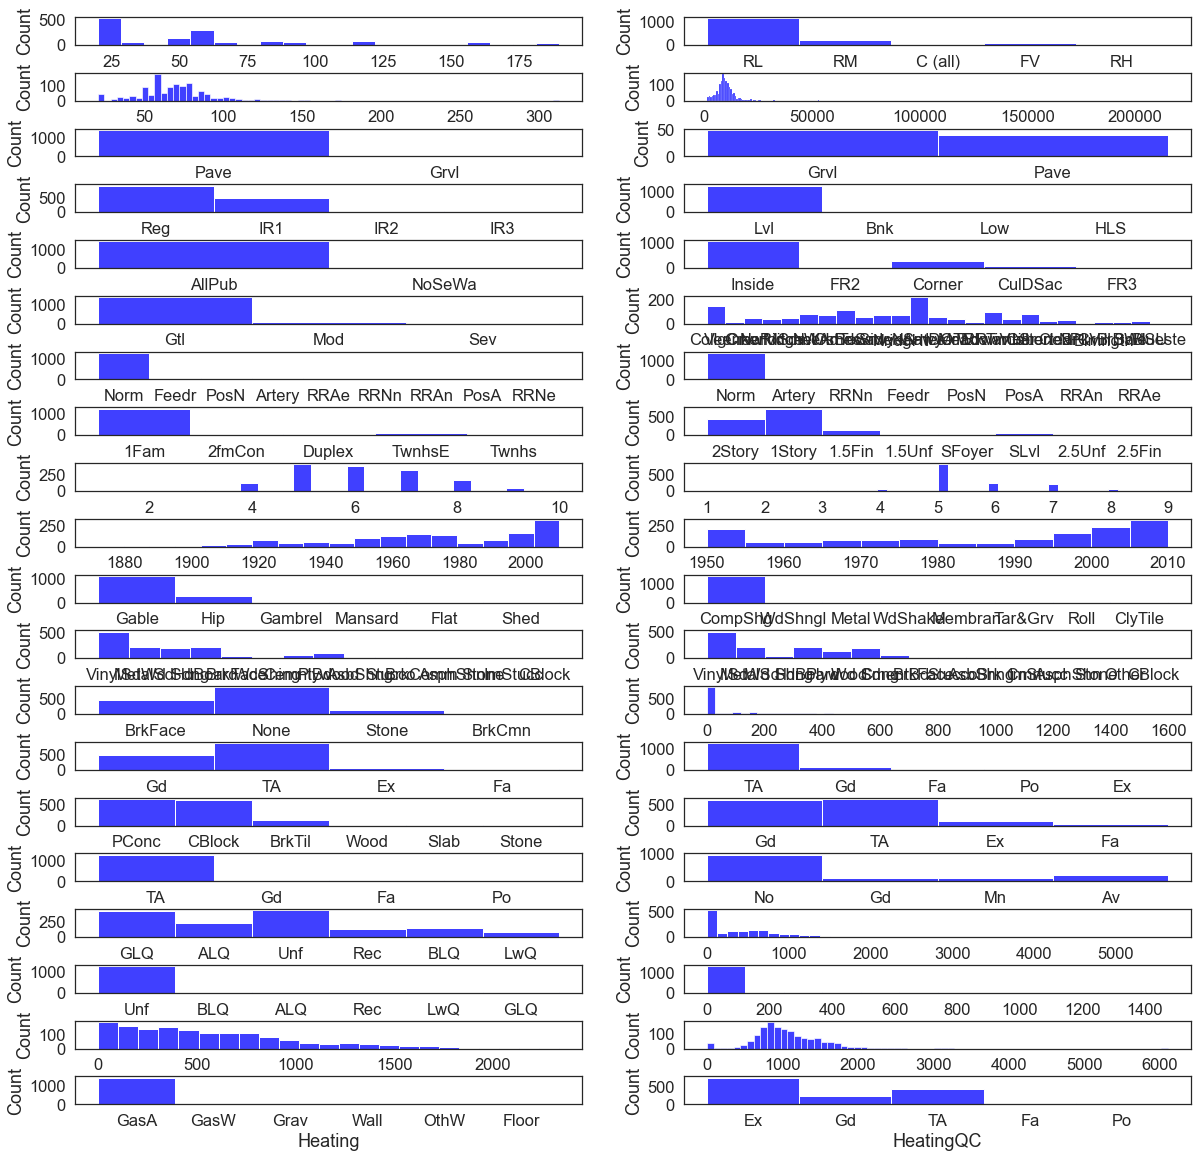

In [96]:
i = 1
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("bright")
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=1)
for feature in house_df.columns:
    plt.subplot(10,2,i)
    sns.histplot(house_df[feature], color='Blue')
    i = i +1

<span style="color:Blue"> Observation:
    
* GarageCars, BsmtHalfBath, BsmtFullBath and GarageCars are discrete variables.
* Some features have a skewed shape to one side.

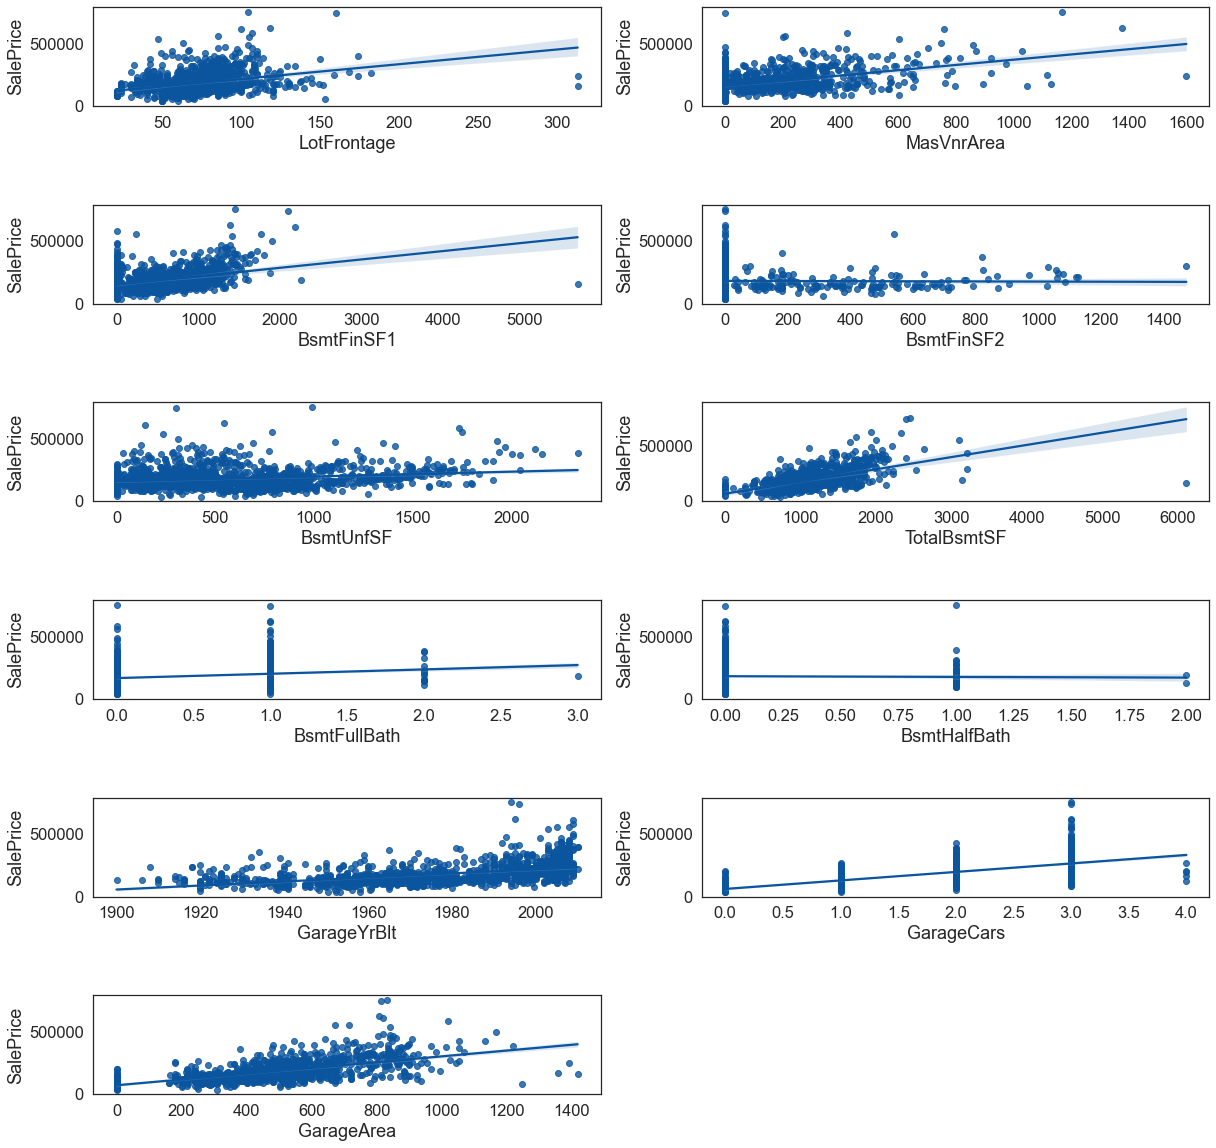

In [30]:
i = 1
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("Blues_r")
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=1)
for feature in float_cols:
    plt.subplot(6,2,i)
    sns.regplot(data=house_df, x=feature,y='SalePrice')
    i = i +1

<span style="color:Blue"> Observation:
    
It seems that there are outliers that deviate from the regression line. Let's check some more.

-------------------------------------------
## Discrete Features

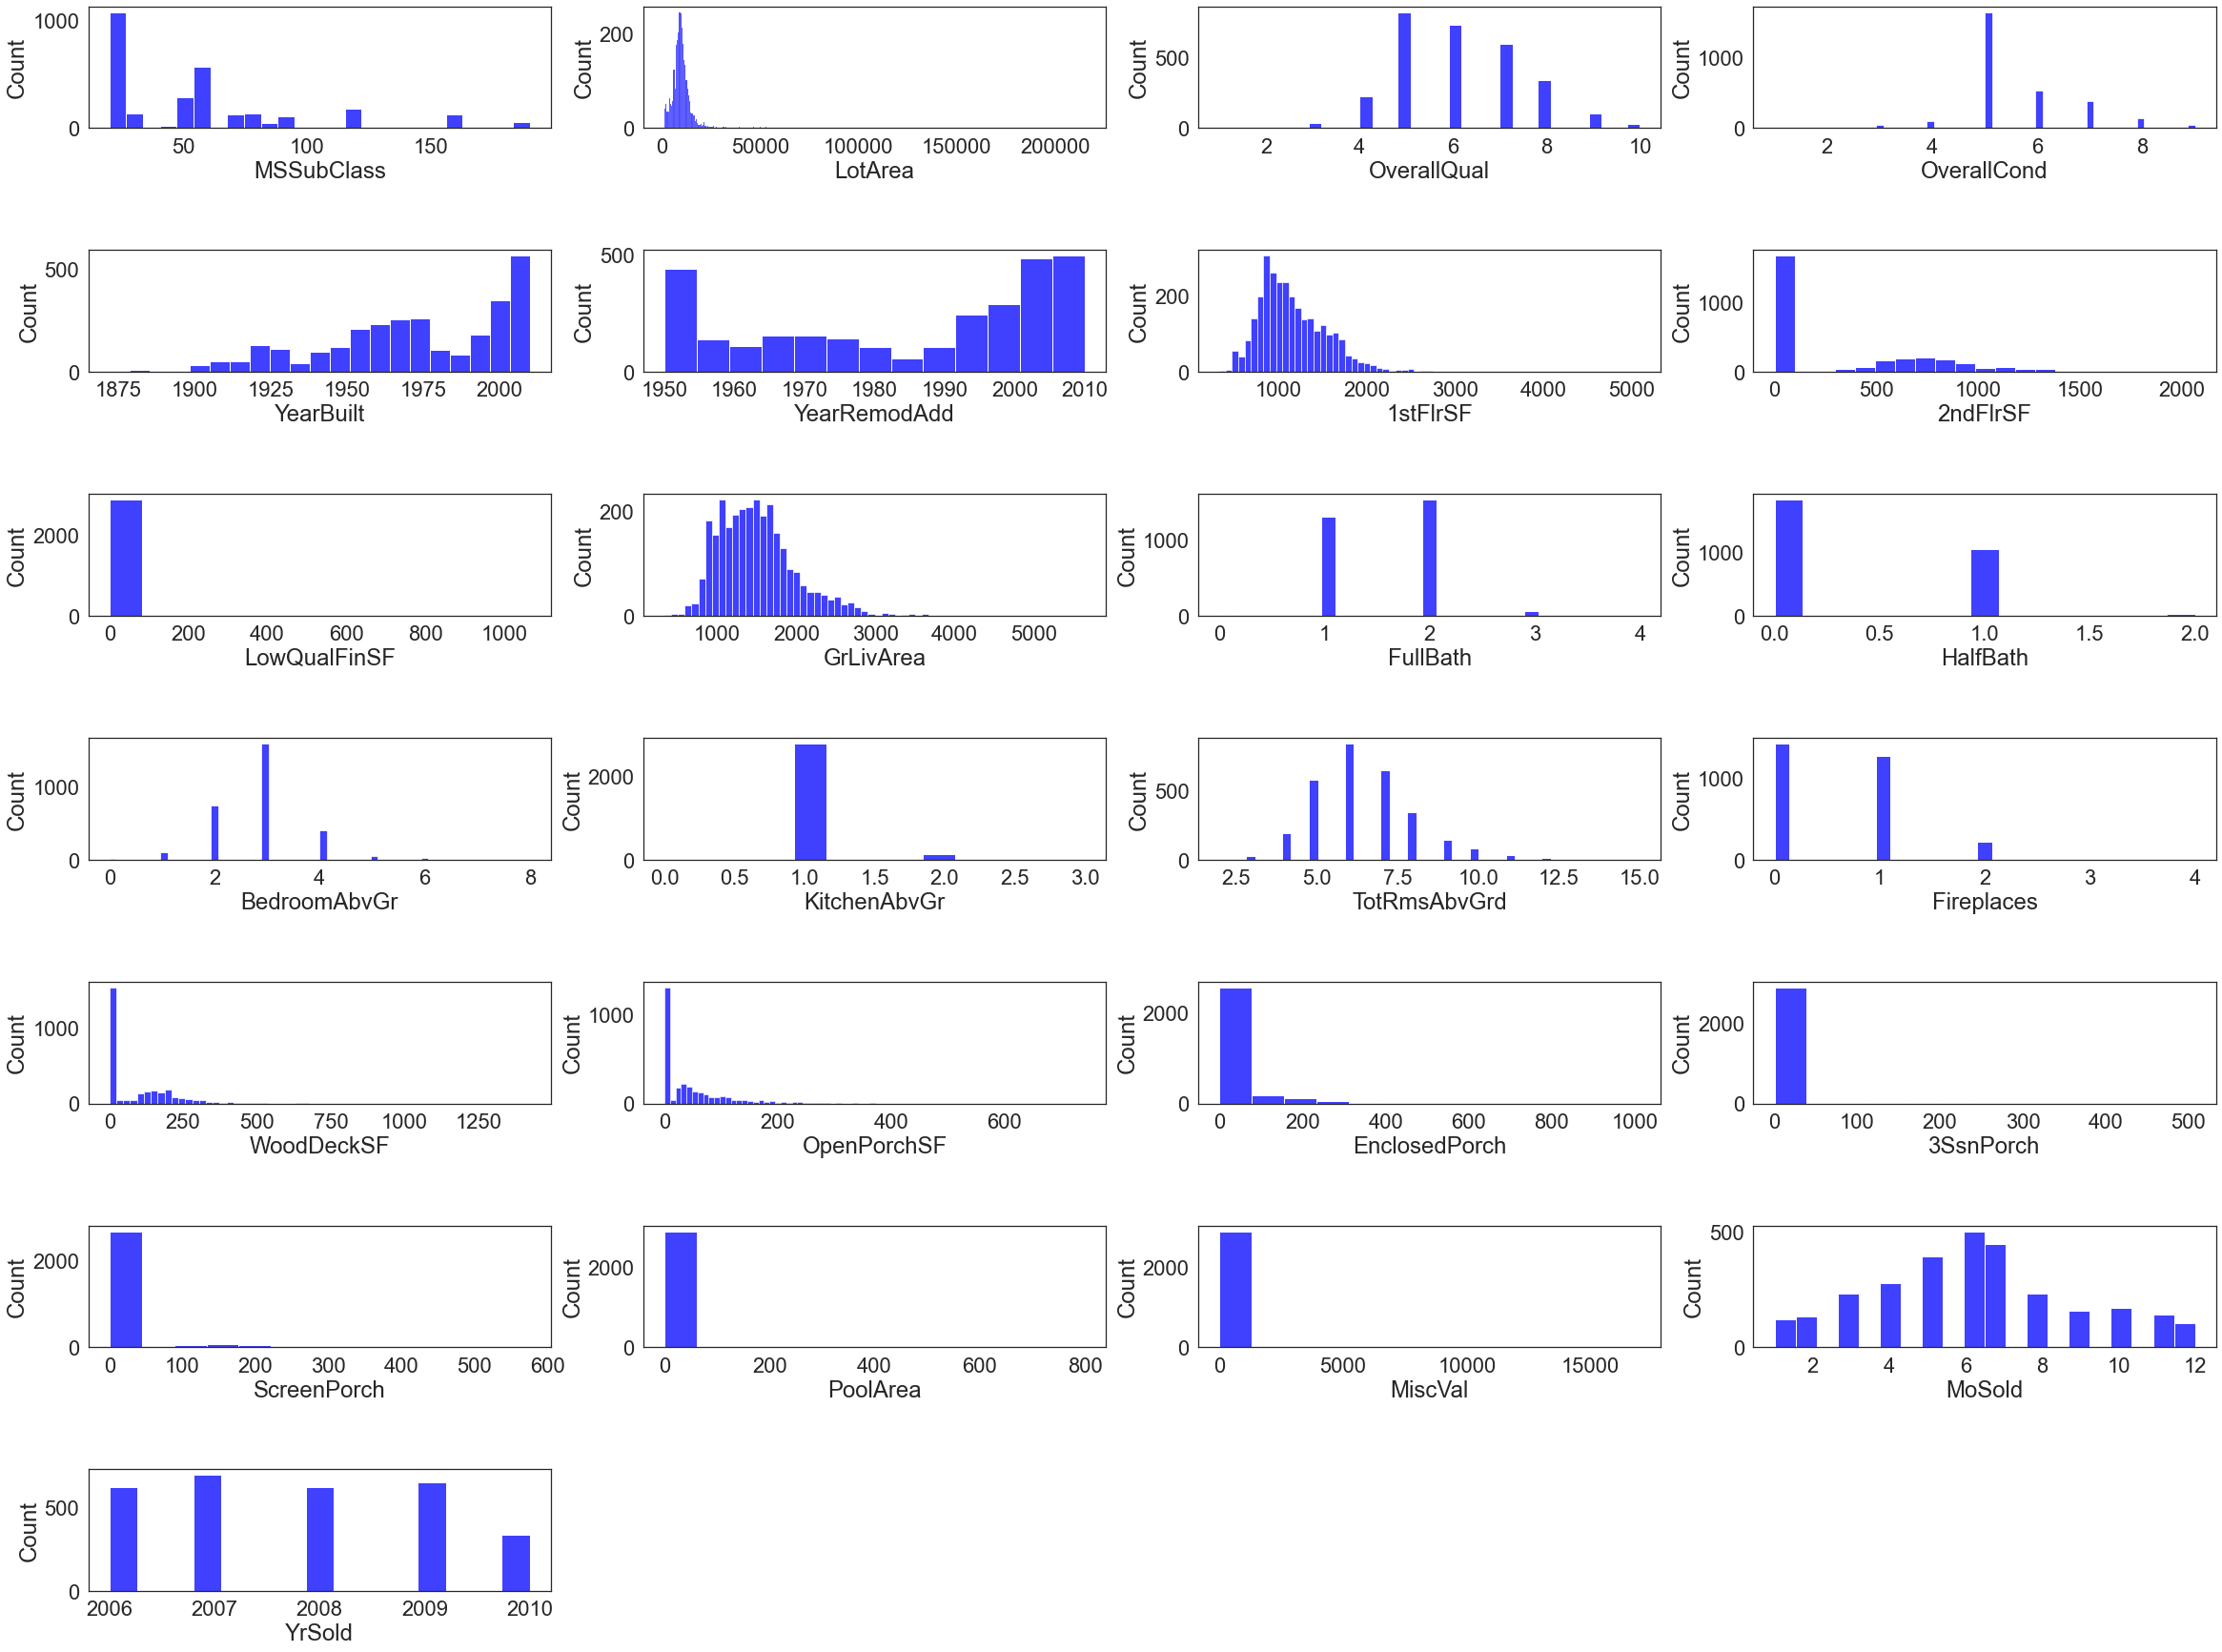

In [31]:
i = 1
sns.set(font_scale = 2)
sns.set_style("white")
sns.set_palette("bright")
plt.figure(figsize=(40, 40))
plt.subplots_adjust(hspace=1)
for feature in int_cols:
    plt.subplot(9,4,i)
    sns.histplot(house_df[feature], color='Blue')
    i = i +1

In the regression problem, discrete and non-order features must be converted to one-hot encoding. 

In [32]:
house_df['MSSubClass'] = house_df['MSSubClass'].apply(str)
house_df['YrSold'] = house_df['YrSold'].astype(str)
house_df['MoSold'] = house_df['MoSold'].astype(str)

Let's update the column lists again.

In [33]:
# "Cardinality" meancategorical_colss the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in house_df.loc[:,:'SaleCondition'].columns if
                    house_df[cname].nunique() < 10 and 
                    house_df[cname].dtype == "object"]

# Select numerical columns
int_cols = [cname for cname in house_df.loc[:,:'SaleCondition'].columns if 
                house_df[cname].dtype in ['int64']]
float_cols = [cname for cname in house_df.loc[:,:'SaleCondition'].columns if 
                house_df[cname].dtype in ['float64']]

numerical_cols = int_cols + float_cols

# Keep selected columns only
my_cols = categorical_cols + numerical_cols

------------------------------------------------------------------------
## Checking Outliers

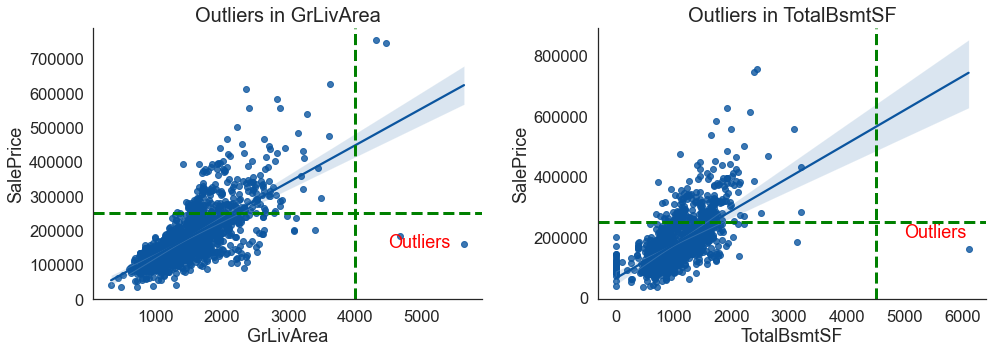

In [34]:
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("Blues_r")
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.3)
ax1 = sns.regplot(data=house_df, x='GrLivArea',y='SalePrice')
ax1.set_title('Outliers in GrLivArea',fontsize=20)
plt.axhline(y=250000, color='Green', linestyle='--', linewidth=3)
plt.axvline(x=4000, color='Green', linestyle='--', linewidth=3)
plt.text(4500, 150000, 'Outliers',color='red')
plt.subplot(1,2,2)
ax2 = sns.regplot(data=house_df, x='TotalBsmtSF',y='SalePrice')
ax2.set_title('Outliers in TotalBsmtSF',fontsize=20)
plt.axhline(y=250000, color='Green', linestyle='--', linewidth=3)
plt.axvline(x=4500, color='Green', linestyle='--', linewidth=3)
plt.text(5000, 200000, 'Outliers',color='red')
sns.despine()

<span style="color:Blue"> Observation:

If you look at the picture above, you can see an outlier. Regression models are sensitive to outliers, so it is better to remove them. Outlier is like gravity. It pulls the regression line. Therefore, it is better to remove outliers.
However, it is not easy to judge an outlier. Domain knowledge may also be required to remove outliers.

-----------------------------------------------------------------------
# Detecting Outliers by PCA

![](https://miro.medium.com/max/602/0*PnqMbZEdnuL9yHuo.png)

Picture Credit: https://miro.medium.com

The more features, the higher the dimension. When projecting to a lower dimension through PCA, new insights can be gained. PCA can effectively detect outliers. Let's apply PCA to this problem and check whether the detection actually confirmed by the eye is also detected through PCA.

In other words, let's reduce the dimension, check the things that are judged as outliers in the reduced dimension, and check whether the row is an outlier for some reason.

**Looking at the figure above, PC 1 has the largest variance in the dataset distribution. That is, the outlier in PC 1 is very likely to be an outlier that needs to be removed from the dataset.
For this reason, there is a high possibility that an outlier to be removed is detected in PC 2 as well.**

In [35]:
features = ["GarageArea","OverallQual","TotalBsmtSF","GrLivArea"]

In [36]:
house_copy = house_df[tr_idx].copy()
y_copy = house_copy.pop("SalePrice")
X_copy = house_copy.loc[:, features]

X_copy.isnull().sum()
pca, X_pca, loadings = apply_pca(X_copy)
print(loadings)

                  PC1       PC2       PC3       PC4
GarageArea   0.491792  0.290203 -0.776894  0.265253
OverallQual  0.532281 -0.179238 -0.012464 -0.827282
TotalBsmtSF  0.482071  0.621855  0.594295  0.166485
GrLivArea    0.492367 -0.704948  0.207593  0.466399


In [37]:
import plotly.express as px
fig = px.histogram(X_pca.melt(), color="variable", 
                   marginal="box",
                   barmode ="overlay",
                   histnorm ='density'
                  )  
fig.update_layout(
    title_font_color="black",
    legend_title_font_color="green",
    title={
        'text': "PCA Histogram",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)

<span style="color:Blue"> Observation:
    
The order of distribution size for each PC is PC1->PC2->PC3->PC4. Since the process of finding a PC through PCA is to find a direction vector with the largest variance, this result is self-evident.
    
Based on the boxplot, there are outliers for each PC. Let's check further if it makes sense to remove those values.

-----------------------------------------------------------------
## The Fist Principal Component

After PCA, if you draw histogram and box plot for each comment, IQR based outliers are visible.



In [ ]:
pc1_outlier_idx = list(outlier_iqr(X_pca['PC1'])[0])

In [ ]:
component = "PC1"

pc1_idx = X_pca[component].sort_values(ascending=False).index
df_temp_pc1 = house_df.loc[pc1_idx, ["SalePrice", "Neighborhood", "SaleCondition"] + features]

def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

df_temp_pc1.iloc[pc1_outlier_idx,:].style.set_properties(**{'background-color': 'Grey',
                            'color': 'white',
                            'border-color': 'darkblack'})

11 outliers were detected as the first principal component.

In [ ]:
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("Blues_r")
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace=0.3)
plt.subplot(4,2,1)
ax1 = sns.regplot(data=house_df, x='GrLivArea',y='SalePrice')
ax1.set_title('Outliers in GrLivArea',fontsize=20)
plt.axhline(y=250000, color='Green', linestyle='--', linewidth=3)
plt.axvline(x=4000, color='Green', linestyle='--', linewidth=3)
plt.text(4500, 200000, 'Outliers',color='red')
plt.subplot(4,2,2)
ax2 = sns.regplot(data=house_df.iloc[pc1_outlier_idx,:], x='GrLivArea',y='SalePrice')
ax2.set_title('Outliers After PCA',fontsize=20)
plt.axhline(y=300000, color='Green', linestyle='--', linewidth=3)
plt.axvline(x=4000, color='Green', linestyle='--', linewidth=3)
plt.text(4500, 200000, 'Outliers',color='red')
plt.subplot(4,2,3)
ax3 = sns.regplot(data=house_df, x='TotalBsmtSF',y='SalePrice')
ax3.set_title('Outliers in TotalBsmtSF',fontsize=20)
plt.axhline(y=450000, color='Green', linestyle='--', linewidth=3)
plt.axvline(x=4500, color='Green', linestyle='--', linewidth=3)
plt.text(5000, 220000, 'Outliers',color='red')
plt.subplot(4,2,4)
ax4 = sns.regplot(data=house_df.iloc[pc1_outlier_idx,:], x='TotalBsmtSF',y='SalePrice')
ax4.set_title('Outliers After PCA',fontsize=20)
plt.axhline(y=450000, color='Green', linestyle='--', linewidth=3)
plt.axvline(x=3500, color='Green', linestyle='--', linewidth=3)
plt.text(5000, 250000, 'Outliers',color='red')
plt.subplot(4,2,5)
ax5 = sns.regplot(data=house_df, x='OverallQual',y='SalePrice')
ax5.set_title('Outliers in OverallQual',fontsize=20)
plt.axhline(y=650000, color='Green', linestyle='--', linewidth=3)
plt.text(6, 700000, 'Outliers',color='red')
plt.subplot(4,2,6)
ax6 = sns.regplot(data=house_df.iloc[pc1_outlier_idx,:], x='OverallQual',y='SalePrice')
ax6.set_title('Outliers After PCA',fontsize=20)
plt.axhline(y=650000, color='Green', linestyle='--', linewidth=3)
plt.text(6, 700000, 'Outliers',color='red')
plt.subplot(4,2,7)
ax7 = sns.regplot(data=house_df, x='GarageArea',y='SalePrice')
ax7.set_title('Outliers in GarageArea',fontsize=20)
plt.axhline(y=700000, color='Green', linestyle='--', linewidth=3)
plt.text(400, 720000, 'Outliers',color='red')
plt.subplot(4,2,8)
ax8 = sns.regplot(data=house_df.iloc[pc1_outlier_idx,:], x='GarageArea',y='SalePrice')
ax8.set_title('Outliers After PCA',fontsize=20)
plt.axhline(y=700000, color='Green', linestyle='--', linewidth=3)
plt.text(1000, 720000, 'Outliers',color='red')
sns.despine()

<span style="color:Blue"> Observation:
    
Looking at the figure above, points that are clearly judged as outliers in the figures on the left are also judged as outliers in PC1 after PCA.
That is, outlier judgment using PCA seems very effective.

-------------------------------------
## The Second Principal Component

In [ ]:
pc2_outlier_idx = list(outlier_iqr(X_pca['PC2'])[0])

In [ ]:
component = "PC2"

pc2_idx = X_pca[component].sort_values(ascending=False).index
df_temp_pc2 = house_df.loc[pc2_idx, ["SalePrice", "Neighborhood", "SaleCondition"] + features]

def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

df_temp_pc2.iloc[pc2_outlier_idx,:].style.set_properties(**{'background-color': 'Grey',
                            'color': 'white',
                            'border-color': 'darkblack'})

<span style="color:Blue"> Observation:
    
There is only one outlier detected as the second Principal Component.

---------------------------
## Removing Outlier using PCA

In [ ]:
house_df.drop(pc1_outlier_idx,axis=0,inplace=True,errors='ignore')
house_df.drop(pc2_outlier_idx,axis=0,inplace=True,errors='ignore')

Let's remove the outliers detected above.

----------------------------------------------------------------
## Checking Outliers after removing outliers

In [ ]:
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("Blues_r")
plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace=0.2,wspace=0.4)
plt.subplot(2,2,1)
sns.regplot(data=house_df, x='GrLivArea',y='SalePrice')
plt.axhline(y=250000, color='Green', linestyle='--', linewidth=3)
plt.axvline(x=4000, color='Green', linestyle='--', linewidth=3)
plt.text(4010, 200000, 'Outliers',color='red')
plt.subplot(2,2,2)
sns.regplot(data=house_df, x='TotalBsmtSF',y='SalePrice')
plt.axhline(y=450000, color='Green', linestyle='--', linewidth=3)
plt.axvline(x=4500, color='Green', linestyle='--', linewidth=3)
plt.text(4800, 250000, 'Outliers',color='red')
plt.subplot(2,2,3)
sns.regplot(data=house_df, x='YearRemodAdd',y='SalePrice')
plt.axhline(y=650000, color='Green', linestyle='--', linewidth=3)
plt.text(2000, 680000, 'Outliers',color='red')
plt.subplot(2,2,4)
sns.regplot(data=house_df, x='GarageArea',y='SalePrice')
plt.axhline(y=680000, color='Green', linestyle='--', linewidth=3)
plt.text(400, 720000, 'Outliers',color='red')
sns.despine()

<span style="color:Blue"> Observation:

Observing the above figures, it can be seen that many of the points previously judged to be outliers have disappeared. Assuming that the outlier has been removed to some extent, let's try another feature engineer.
Of course, we can delete outliers directly by looking at each graph, but in doing so, our model reads a lot of generality. The method using PCA is reasonable and can be used generally.
It can be used for this problem as well as other problems.

Also, as the outliers are removed, the regression line seems to be well-fitted to more general data.

------------------------------------------------------
# Adding New Derived Features using Numerical Feature

Let's create a new derived variable so that our model can learn better.

* TotalBsmtSF: Total square feet of basement area
* GrLivArea: Above grade (ground) living area square feet
* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
* 1stFlrSF: First Floor square feet 
* 2ndFlrSF: Second floor square feet

## Question 1: Does the combination of underground and above-ground area have a high correlation with the Sale Price?

* TotalBsmtSF: Total square feet of basement area
* GrLivArea: Above grade (ground) living area square feet

In [38]:
house_df["AllArea"] = house_df.GrLivArea + house_df.TotalBsmtSF

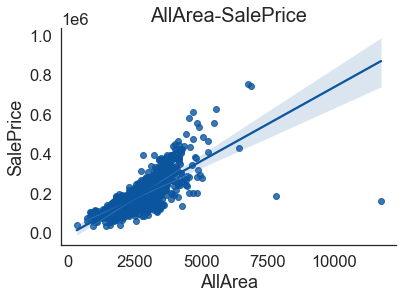

In [39]:
sns.set_style("white")
sns.set_palette("Blues_r")
sns.regplot(data=house_df, x='AllArea',y='SalePrice')
plt.title('AllArea-SalePrice',fontsize=20)
sns.despine()

## Question 2: If you recently remodeled and have a large basement, will your sale price increase?

* TotalBsmtSF: Total square feet of basement area
* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

In [40]:
house_df["NewBsmtSF"] = house_df['YearRemodAdd'] + house_df['TotalBsmtSF']

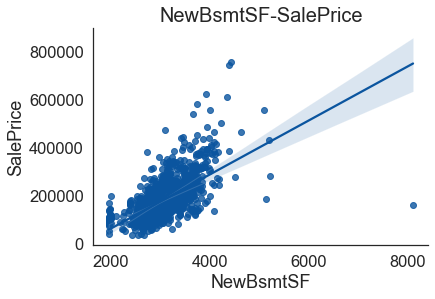

In [41]:
sns.set_style("white")
sns.set_palette("Blues_r")
sns.regplot(data=house_df, x='NewBsmtSF',y='SalePrice')
plt.title('NewBsmtSF-SalePrice',fontsize=20)
sns.despine()

## Question 3: Can the combined area of the 1st and 2nd floors affect the sale price?
* 1stFlrSF: First Floor square feet 
* 2ndFlrSF: Second floor square feet

In [42]:
house_df["HighQualSF"] = house_df["1stFlrSF"] + house_df["2ndFlrSF"]

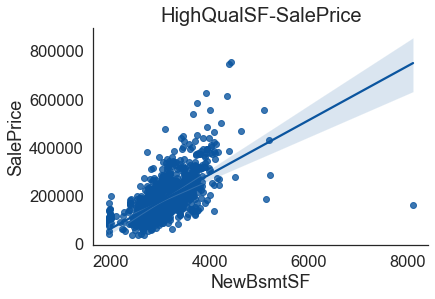

In [43]:
sns.set_style("white")
sns.set_palette("Blues_r")
sns.regplot(data=house_df, x='NewBsmtSF',y='SalePrice')
plt.title('HighQualSF-SalePrice',fontsize=20)
sns.despine()

**Good derivative features come from good questions. Good questions come from a lot of domain-knowledge.**

Should I really be a real estate agent? If you have any good information, please share.

----------------------------------------------------
# Scaling

There are various scaling methods for numerical features. However, we did log scaling, which is a non-linear scaling of our target. Therefore, other numerical features are also subjected to log scaling.

In [44]:
# "Cardinality" meancategorical_colss the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in house_df.loc[:,:'SaleCondition'].columns if
                    house_df[cname].nunique() < 10 and 
                    house_df[cname].dtype == "object"]

# Select numerical columns
int_cols = [cname for cname in house_df.loc[:,:'SaleCondition'].columns if 
                house_df[cname].dtype in ['int64']]
float_cols = [cname for cname in house_df.loc[:,:'SaleCondition'].columns if 
                house_df[cname].dtype in ['float64']]

numerical_cols = int_cols + float_cols

# Keep selected columns only
my_cols = categorical_cols + numerical_cols

First, let's check skewness. A skewness greater than 1 is generally judged to be skewed, so check mainly those greater than 1.

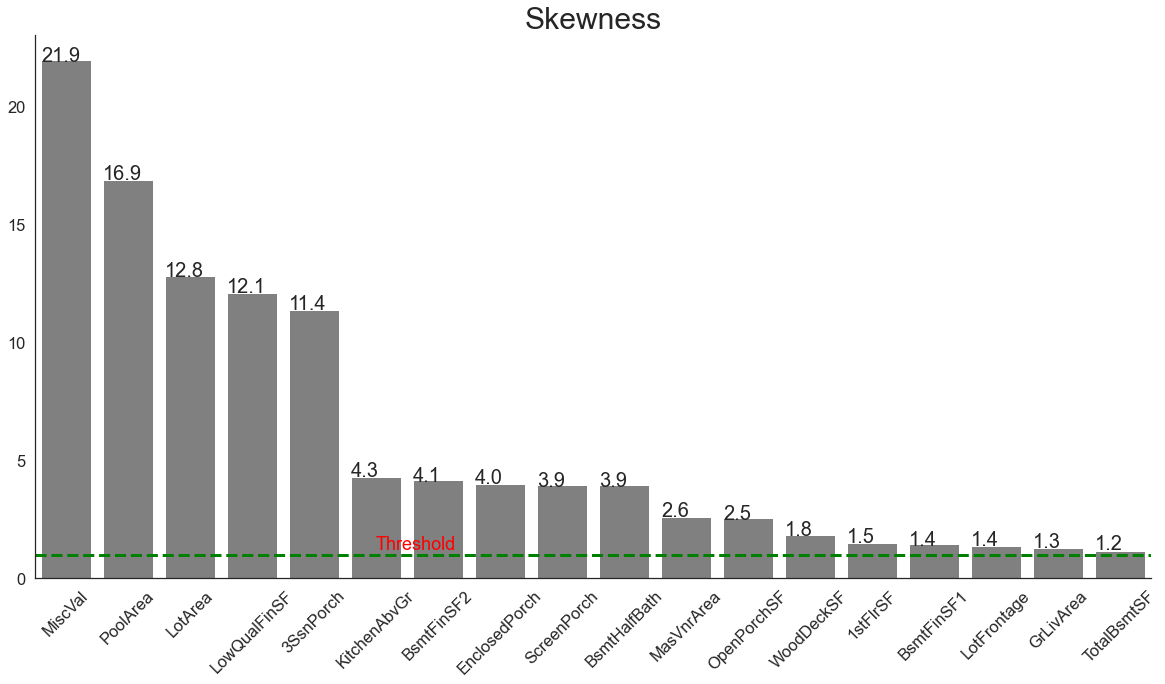

In [45]:
from scipy.stats import skew
plt.figure(figsize=(20, 10))
skew_features = house_df[numerical_cols].apply(lambda x : skew(x))
skew_features = skew_features[skew_features > 1].sort_values(ascending=False)
ax = sns.barplot( x =skew_features.index,y=skew_features.values,color='grey')
for p in ax.patches:
    height = p.get_height().round(1)
    ax.text(p.get_x()+ p.get_width()//2, height, height, ha = 'left', size = 20)
plt.xticks(rotation=45)
plt.text(5, 1.2, 'Threshold',color='red')
plt.axhline(y=1, color='green', linestyle='--', linewidth=3)
plt.title('Skewness',fontsize=30)
sns.despine()

<span style="color:Blue"> Observation:
    
It is conformed that 14 features are skewed. We will do log transformation for these features.

In [46]:
house_df[skew_features.index] = np.log1p(house_df[skew_features.index])

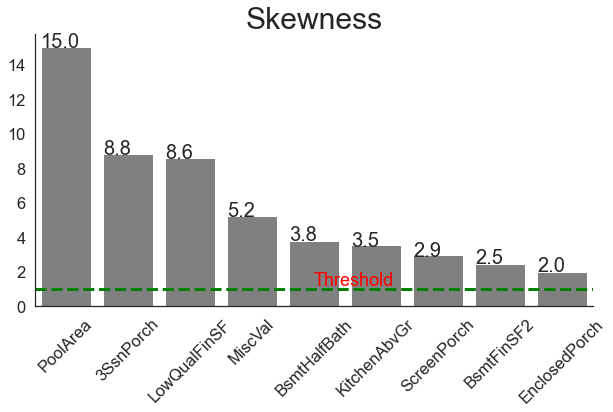

In [47]:
from scipy.stats import skew
plt.figure(figsize=(10, 5))
skew_features = house_df[numerical_cols].apply(lambda x : skew(x))
skew_features = skew_features[skew_features > 1].sort_values(ascending=False)
ax = sns.barplot( x =skew_features.index,y=skew_features.values,color='grey')
for p in ax.patches:
    height = p.get_height().round(1)
    ax.text(p.get_x()+ p.get_width()//2, height, height, ha = 'left', size = 20)
plt.xticks(rotation=45)
plt.axhline(y=1, color='green', linestyle='--', linewidth=3)
plt.text(4, 1.2, 'Threshold',color='red')
plt.title('Skewness',fontsize=30)
sns.despine()

The number of skewed features is reduced from 14 to 9. The remaining 4 skewness was greatly reduced.

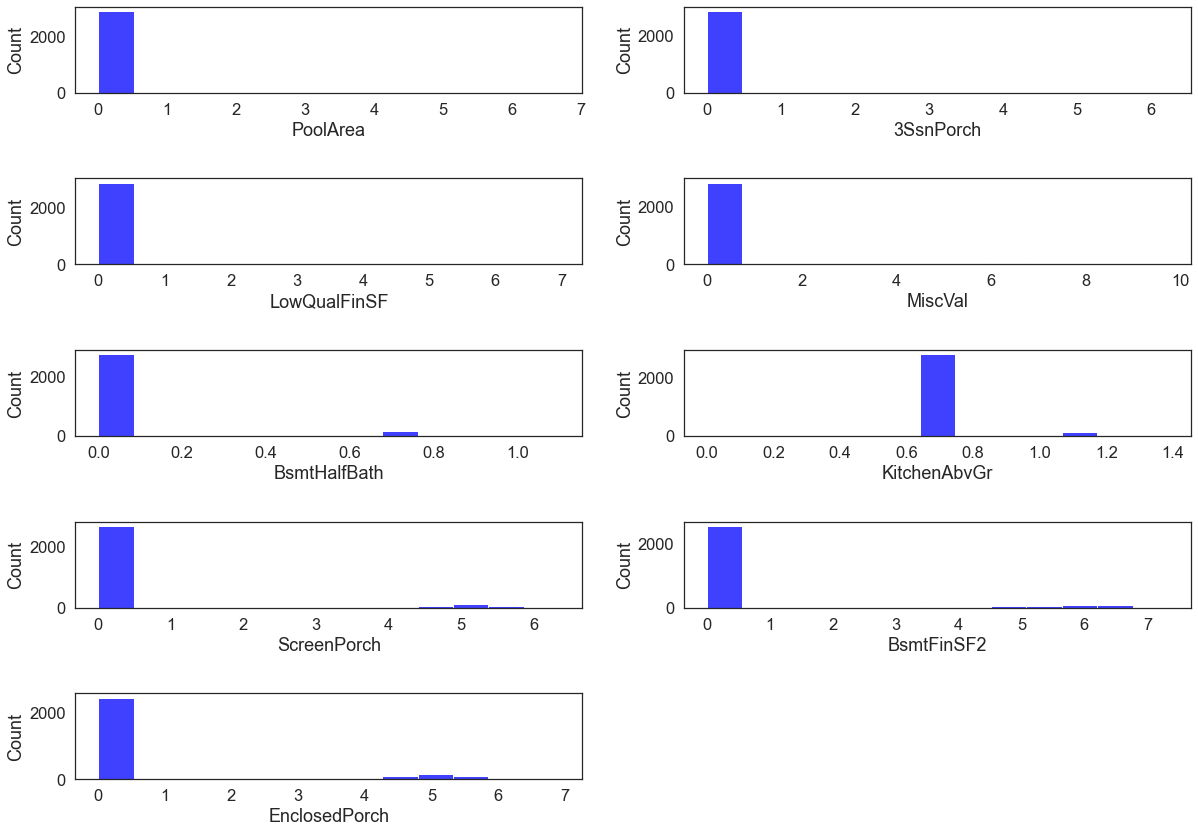

In [48]:
i = 1
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("gist_yarg_r")
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace=1)
for feature in skew_features.index:
    plt.subplot(10,2,i)
    sns.histplot(house_df[feature], color='blue')
    i = i +1

Some features still have skewness greater than 1, but further improvement seems difficult.

----------------------------------------------------------------
# Doing EDA for Categorical Features

![](https://miro.medium.com/max/1400/1*wYbTRM0dgnRzutwZq63xCg.png)

Picture Credit: https://miro.medium.com

Categorical data can be classified into ordinal data and nominal data. In the case of an ordinal type, there is a difference in importance for each level. This value plays an important role in the case of regression, so encode it with care.

It is difficult to encode categorical features compared to numeric features. For ordinal data, it is more difficult.

In [49]:
categorical_cols = [cname for cname in house_df.columns if
                    house_df[cname].dtype == "object"]

------------------------------------------------------------------------
## Filling missing values

A good way to fill in the missing values of categorical features in the absence of domain-knowledge is to take the most-frequent strategy.

> Imputation is the standard approach, and it usually works well. However, imputed values may be systematically above or below their actual values (which weren't collected in the dataset). Or rows with missing values may be unique in some other way. In that case, your model would make better predictions by considering which values were originally missing.

![](https://i.imgur.com/UWOyg4a.png)

> In this approach, we impute the missing values, as before. And, additionally, for each column with missing entries in the original dataset, we add a new column that shows the location of the imputed entries.
> 
> In some cases, this will meaningfully improve results. In other cases, it doesn't help at all.

Ref: https://www.kaggle.com/alexisbcook/missing-values

## Checking Missig Values Again

Only features with more than 20 missing values are checked. It was judged that the smaller features were probably omitted due to a mistake during the recording process.

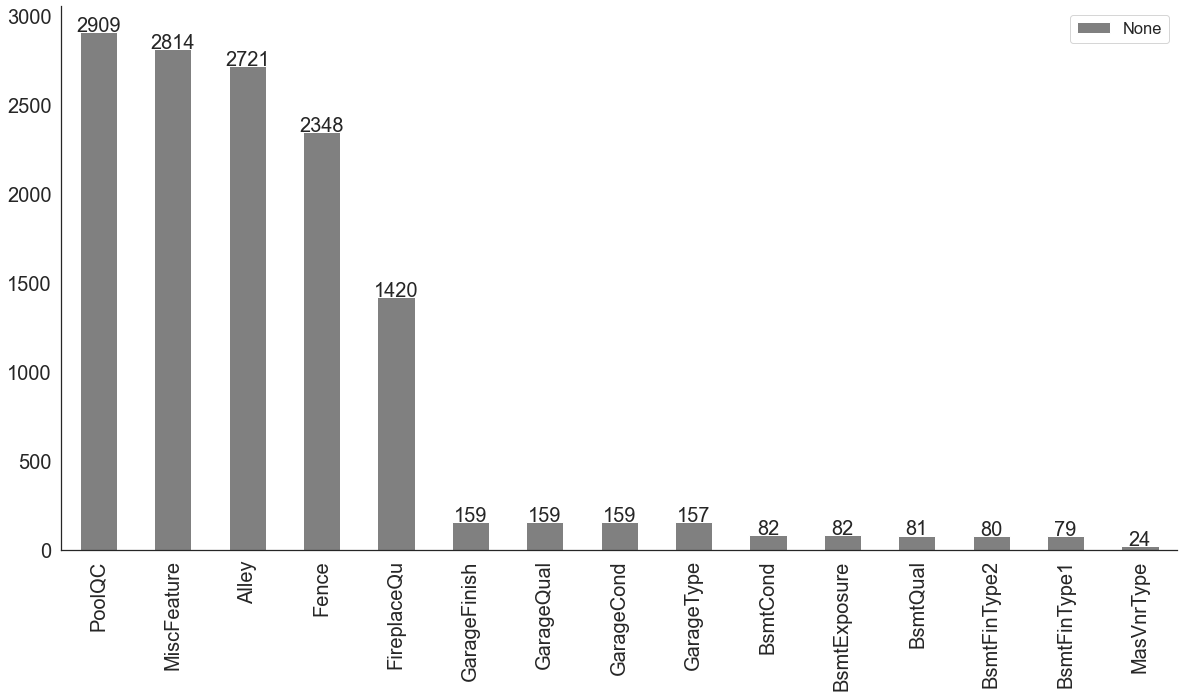

In [50]:
isnull_series = house_df.loc[:,:'SaleCondition'].isnull().sum()
isnull_series[isnull_series >= 20].sort_values(ascending=False)

plt.figure(figsize = (20,10))
ax = isnull_series[isnull_series >= 20].sort_values(ascending=False).plot(kind='bar',
                                                                        grid = False,
                                                                        fontsize=20,
                                                                        color='grey')
plt.legend(loc = 'upper right')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 5, height, ha = 'center', size = 20)
sns.despine()

## PoolQC: Pool quality 

**Question: Does the lack of pool quality mean that the house does not have a pool? If so, is there a relationship between the missing value and the house price?**

<AxesSubplot:xlabel='HasPoolQC', ylabel='SalePrice'>

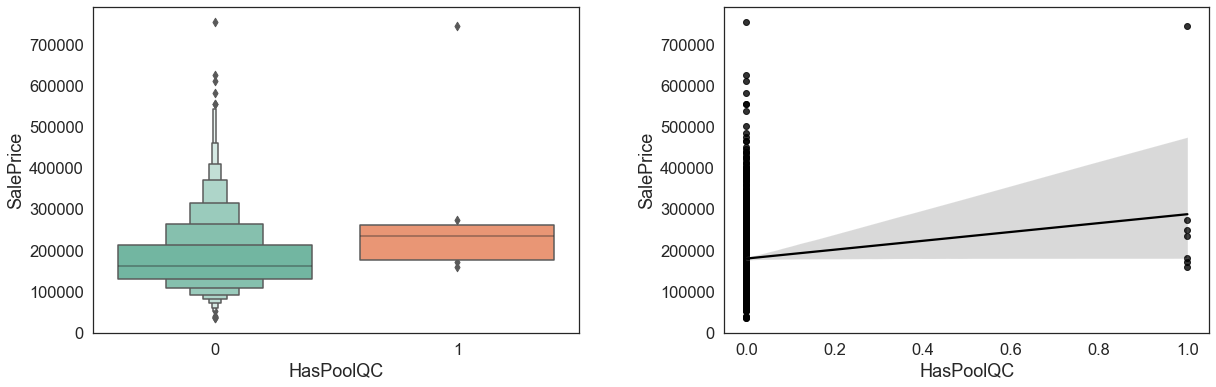

In [51]:
house_df['HasPoolQC'] = house_df['PoolQC'].notnull().astype(int)

plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
sns.boxenplot(data=house_df, x='HasPoolQC',y='SalePrice',palette='Set2')
plt.subplot(1,2,2)
sns.regplot(data=house_df, x='HasPoolQC',y='SalePrice',color='black')

## MiscFeature: Miscellaneous feature not covered in other categories

**Question: Is there a difference in house price with and without miscellaneous features?**

<AxesSubplot:xlabel='HasMiscFeature', ylabel='SalePrice'>

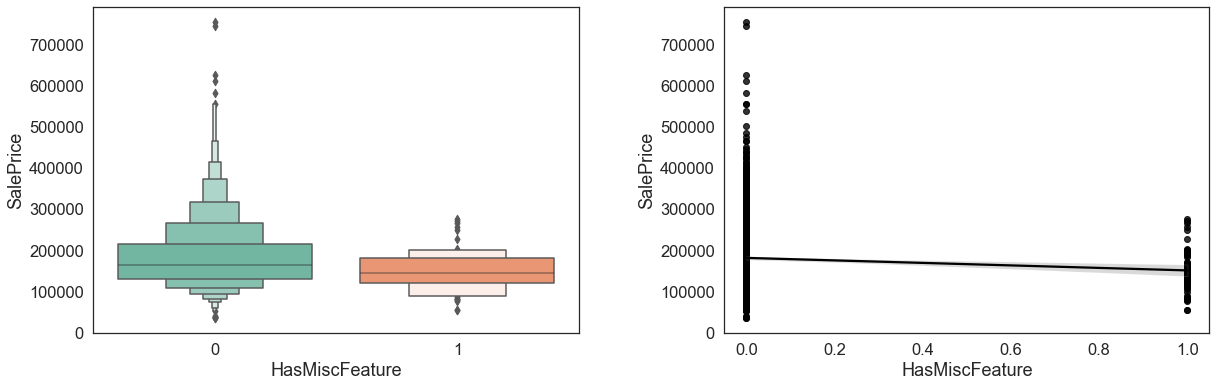

In [52]:
house_df['HasMiscFeature'] = house_df['MiscFeature'].notnull().astype(int)

plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
sns.boxenplot(data=house_df, x='HasMiscFeature',y='SalePrice',palette='Set2')
plt.subplot(1,2,2)
sns.regplot(data=house_df, x='HasMiscFeature',y='SalePrice',color='black')

## Alley: Type of alley access to property

**Question: Is there a difference in house price with and without Alley access?**

<AxesSubplot:xlabel='HasAlley', ylabel='SalePrice'>

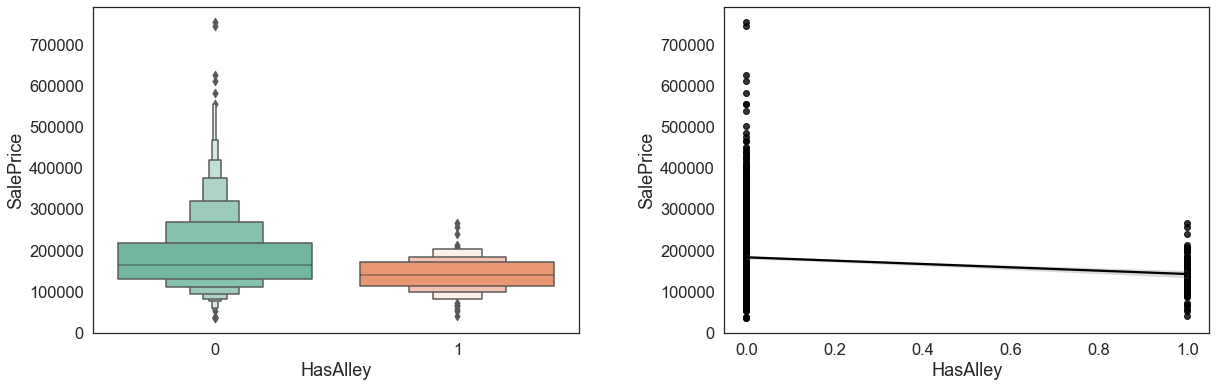

In [53]:
house_df['HasAlley'] = house_df['Alley'].notnull().astype(int)

plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
sns.boxenplot(data=house_df, x='HasAlley',y='SalePrice',palette='Set2')
plt.subplot(1,2,2)
sns.regplot(data=house_df, x='HasAlley',y='SalePrice',color='black')

## Fence: Fence quality

**Question: Is there a difference in house price with and without fence?**

<AxesSubplot:xlabel='HasFence', ylabel='SalePrice'>

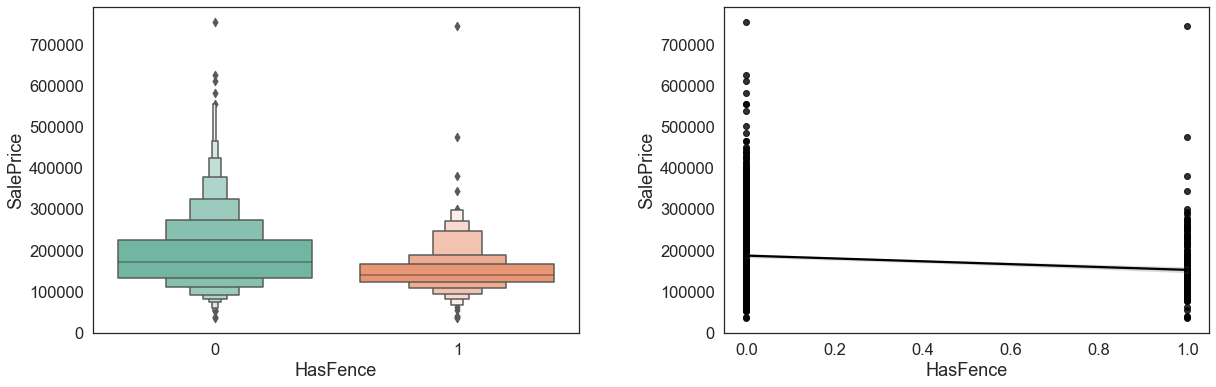

In [54]:
house_df['HasFence'] = house_df['Fence'].notnull().astype(int)

plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
sns.boxenplot(data=house_df, x='HasFence',y='SalePrice',palette='Set2')
plt.subplot(1,2,2)
sns.regplot(data=house_df, x='HasFence',y='SalePrice',color='black')

## FireplaceQu: Fireplace quality

**Question: Is there a difference in house prices with and without Fireplace?**

<AxesSubplot:xlabel='HasFireplaceQu', ylabel='SalePrice'>

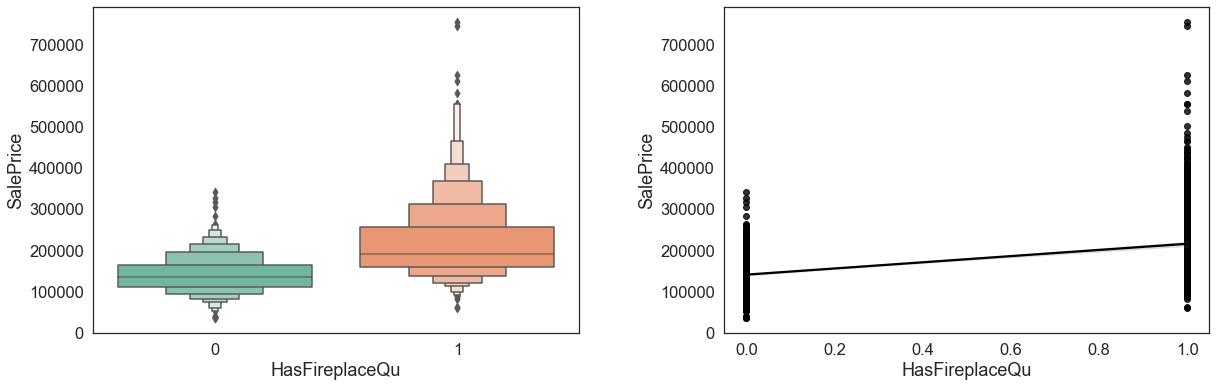

In [55]:
house_df['HasFireplaceQu'] = house_df['FireplaceQu'].notnull().astype(int)

plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
sns.boxenplot(data=house_df, x='HasFireplaceQu',y='SalePrice',palette='Set2')
plt.subplot(1,2,2)
sns.regplot(data=house_df, x='HasFireplaceQu',y='SalePrice',color='black')

## Garage Features

**Question: Is there a difference in house price with and without Garage?**

<AxesSubplot:xlabel='HasGarageQual', ylabel='SalePrice'>

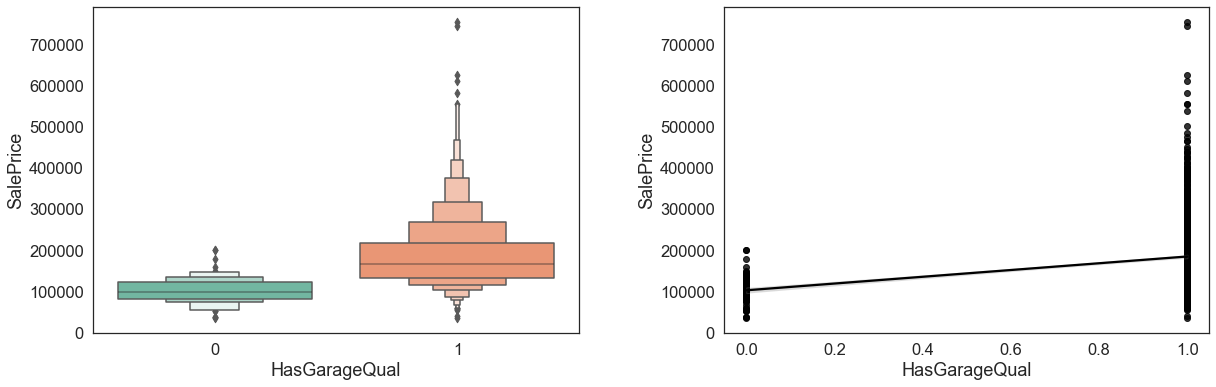

In [56]:
house_df['HasGarageQual'] = house_df['GarageQual'].notnull().astype(int)

plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
sns.boxenplot(data=house_df, x='HasGarageQual',y='SalePrice',palette='Set2')
plt.subplot(1,2,2)
sns.regplot(data=house_df, x='HasGarageQual',y='SalePrice',color='black')

## Basement features

**Question: Is there a difference in the house price with and without a Basement?**

<AxesSubplot:xlabel='HasBsmtQual', ylabel='SalePrice'>

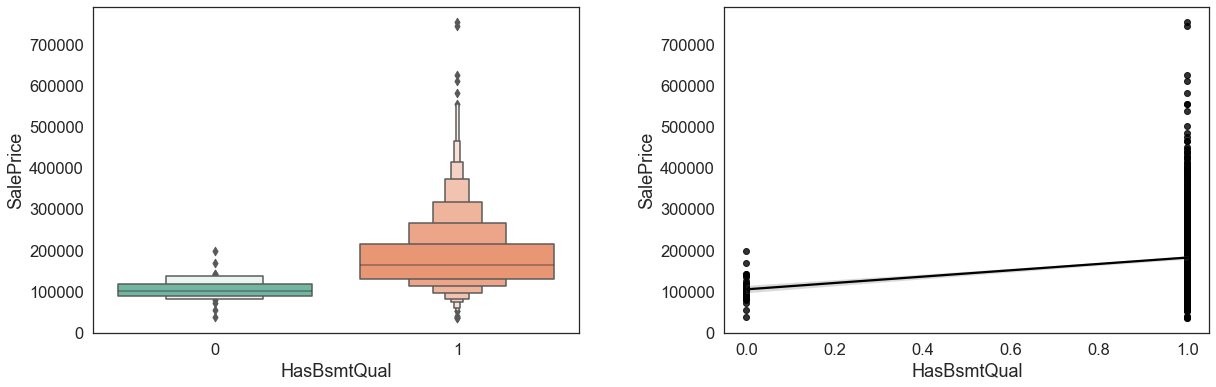

In [57]:
house_df['HasBsmtQual'] = house_df['BsmtQual'].notnull().astype(int)

plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
sns.boxenplot(data=house_df, x='HasBsmtQual',y='SalePrice',palette='Set2')
plt.subplot(1,2,2)
sns.regplot(data=house_df, x='HasBsmtQual',y='SalePrice',color='black')

## MasVnrType: Masonry veneer type

**Question: Is there a difference in house price with and without Masonry veneer?**

<AxesSubplot:xlabel='HasMasVnrType', ylabel='SalePrice'>

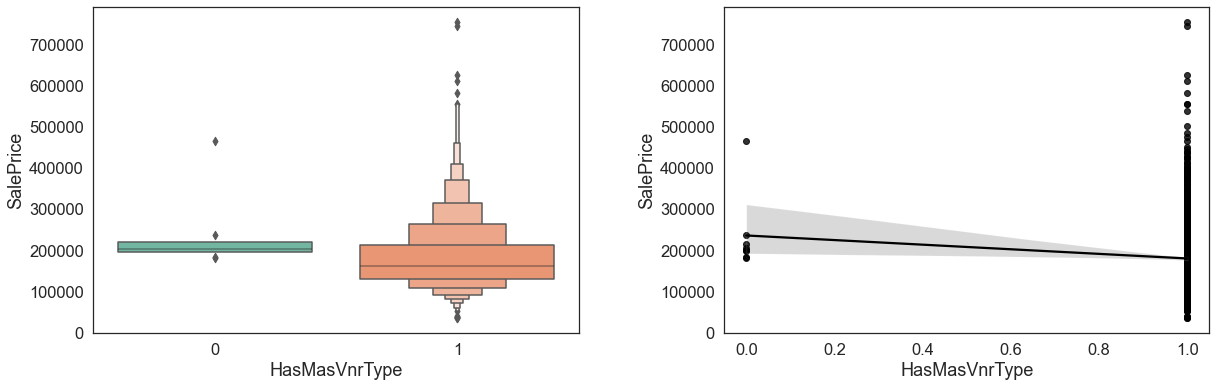

In [58]:
house_df['HasMasVnrType'] = house_df['MasVnrType'].notnull().astype(int)

plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
sns.boxenplot(data=house_df, x='HasMasVnrType',y='SalePrice',palette='Set2')
plt.subplot(1,2,2)
sns.regplot(data=house_df, x='HasMasVnrType',y='SalePrice',color='black')

In [59]:
house_df['Alley'] = house_df['Alley'].fillna('missing')
house_df['MasVnrType'] = house_df['MasVnrType'].fillna('None')
house_df['GarageType'] = house_df['GarageType'].fillna('missing')
house_df['GarageCond'] = house_df['GarageCond'].fillna('missing')
house_df['Fence'] = house_df['Fence'].fillna('missing')
house_df['Street'] = house_df['Street'].fillna('missing')
house_df['LotShape'] = house_df['LotShape'].fillna('missing')
house_df['LandContour'] = house_df['LandContour'].fillna('missing')
house_df['BsmtFinType1'] = house_df['BsmtFinType1'].fillna('missing')
house_df['BsmtFinType2'] = house_df['BsmtFinType2'].fillna('missing')
house_df['CentralAir'] = house_df['CentralAir'].fillna('missing')
house_df['MiscFeature'] = house_df['MiscFeature'].fillna('missing')
house_df['Utilities'] = house_df['Utilities'].fillna('missing')
house_df['SaleCondition'] = house_df['SaleCondition'].fillna('missing')
house_df["Functional"] = house_df["Functional"].fillna("Typ")

In [60]:
house_df['MSZoning'] = house_df['MSZoning'].fillna(house_df['MSZoning'].mode()[0])
house_df['PoolQC'] = house_df['PoolQC'].fillna(house_df['PoolQC'].mode()[0])
house_df['BsmtQual'] = house_df['BsmtQual'].fillna(house_df['BsmtQual'].mode()[0])
house_df['BsmtCond'] = house_df['BsmtCond'].fillna(house_df['BsmtCond'].mode()[0])
house_df['FireplaceQu'] = house_df['FireplaceQu'].fillna(house_df['FireplaceQu'].mode()[0])
house_df['GarageFinish'] = house_df['GarageFinish'].fillna(house_df['GarageFinish'].mode()[0])
house_df['GarageQual'] = house_df['GarageQual'].fillna(house_df['GarageQual'].mode()[0])
house_df['BsmtExposure'] = house_df['BsmtExposure'].fillna(house_df['BsmtExposure'].mode()[0])
house_df['Electrical'] = house_df['Electrical'].fillna(house_df['Electrical'].mode()[0])
house_df['Exterior1st'] = house_df['Exterior1st'].fillna(house_df['Exterior1st'].mode()[0])
house_df['Exterior2nd'] = house_df['Exterior2nd'].fillna(house_df['Exterior2nd'].mode()[0])    
house_df['KitchenQual'] = house_df['KitchenQual'].fillna(house_df['KitchenQual'].mode()[0])
house_df['SaleType'] = house_df['SaleType'].fillna(house_df['SaleType'].mode()[0])

-----------------------------------------------------
# Checking Ordinal Features
In some cases, it is easy to judge that there is an order on a commonsense level. However, there are many cases where it is difficult to judge that there is an order. The method used in this notebook to determine whether the features are ordinal or not was determined to have a certain order through visualization. However, if you have real estate knowledge, you will be able to determine the order of each level by classifying ordinal features smarter than me.





------------------------------------------------------------------------
## MSZoning

Identifies the general zoning classification of the sale.

* A: Agriculture
* C: Commercial
* FV: Floating Village Residential
* I: Industrial
* RH: Residential High Density
* RL: Residential Low Density
* RP: Residential Low Density Park
* RM: Residential Medium Density

In [61]:
house_df['MSZoning'] = house_df['MSZoning'].replace({'C (all)':1,'RM':2,'RH':3,'RL':4,'FV':5})

## Condition1/Condition2
Proximity to various conditions

* Artery: Adjacent to arterial street
* Feedr: Adjacent to feeder street
* Norm: Normal
* RRNn: Within 200' of North-South Railroad
* RRAn: Adjacent to North-South Railroad
* PosN: Near positive off-site feature--park, greenbelt, etc.
* PosA: Adjacent to postive off-site feature
* RRNe: Within 200' of East-West Railroad
* RRAe: Adjacent to East-West Railroad

In [62]:
house_df['Condition1'] = house_df['Condition1'].replace({'Artery':1,
                                                         'RRAe':1,
                                                         'RRNn':1,
                                                         'Feedr':1,
                                                         'RRNe':1,
                                                         'RRAn':1,
                                                         'Norm':2,
                                                         'PosA':3,
                                                         'PosN':3})

In [63]:
house_df['Condition2'] = house_df['Condition2'].replace({'RRNn':1,
                                                         'Artery':2, 
                                                         'Feedr':2,
                                                         'RRAn':2,
                                                         'RRAe':2,    
                                                         'Norm':2,
                                                         'PosA':3,
                                                         'PosN':3})

## HouseStyle:
HouseStyle: Style of dwelling

* 1Story: One story
* 1.5Fin: One and one-half story: 2nd level finished
*    1.5Unf: One and one-half story: 2nd level unfinished
*    2Story: Two story
*    2.5Fin: Two and one-half story: 2nd level finished
*    2.5Unf: Two and one-half story: 2nd level unfinished
*    SFoyer: Split Foyer
*    SLvl: Split Level

In [64]:
def HouseStyleToInt(x):
    if(x=='1.5Unf'):
        r = 0
    elif(x=='SFoyer'):
        r = 1
    elif(x=='1.5Fin'):
        r = 2
    elif(x=='2.5Unf'):
        r = 3
    elif(x=='SLvl'):
        r = 4
    elif(x=='1Story'):
        r = 5
    elif(x=='2Story'):
        r = 6  
    elif(x==' 2.5Fin'):
        r = 7          
    else:
        r = 8
    return r

house_df['HouseStyle'] = house_df['HouseStyle'].apply(HouseStyleToInt)

## MasVnrType
Masonry veneer type

* BrkCmn Brick Common
* BrkFace Brick Face
* CBlock Cinder Block
* None None
* Stone Stone

In [65]:
def MasVnrTypeToInt(x):
    if(x=='Stone'):
        r = 3
    elif(x=='BrkFace'):
        r = 2
    elif(x=='BrkCmn'):
        r = 1        
    else:
        r = 0
    return r

house_df['MasVnrType'] = house_df['MasVnrType'].apply(MasVnrTypeToInt)

## Foundation
Type of foundation

* BrkTil Brick & Tile
* CBlock Cinder Block
* PConc Poured Contrete
* Slab Slab
* Stone Stone
* Wood Wood

In [ ]:
foundation_label = {'Slab':1,'BrkTil':2,'Stone':2,'CBlock':3,'Wood':4,'PConc':5}
house_df['Foundation'] = house_df['Foundation'].replace(foundation_label)

## GarageType
Garage location

* 2Types More than one type of garage
* Attchd Attached to home
* Basment Basement Garage
* BuiltIn Built-In (Garage part of house - typically has room above garage)
* CarPort Car Port
* Detchd Detached from home
* NA No Garage

In [ ]:
garagetype_label = {'CarPort':1,'Basment':2,'Detchd':2,'Attchd':3,'2Types':3,'BuiltIn':4}
house_df['GarageType'] = house_df['GarageType'].replace(garagetype_label)

## GarageFinish
Interior finish of the garage

* Fin Finished
* RFn Rough Finished
* Unf Unfinished
* NA No Garage

In [ ]:
house_df['GarageFinish'] = house_df['GarageFinish'].replace({'Unf':1,'RFn':2,'Fin':3})

## PavedDrive
Paved driveway

* Y Paved
* P Partial Pavement
* N Dirt/Gravel

In [ ]:
house_df['PavedDrive'] = house_df['PavedDrive'].replace({'N':1,'P':2,'Y':3})

## SaleCondition
Condition of sale

* Normal: Normal Sale
* Abnorml: Abnormal Sale - trade, foreclosure, short sale
* AdjLand: Adjoining Land Purchase
* Alloca: Allocation - two linked properties with separate deeds, typically condo with a garage unit
* Family: Sale between family members
* Partial: Home was not completed when last assessed (associated with New Homes)

In [ ]:
salecon_label = {'AdjLand':1,'Abnorml':2,'Family':2,'Alloca':2,'Normal':3,'Partial':4}
house_df['SaleCondition'] = house_df['SaleCondition'].replace(salecon_label)

## Exterior1st / Exterior2nd
Exterior covering on house

* AsbShng: Asbestos Shingles
* AsphShn: Asphalt Shingles
* BrkComm: Brick Common
* BrkFace: Brick Face
* CBlock: Cinder Block
* CemntBd: Cement Board
* HdBoard: Hard Board
* ImStucc: Imitation Stucco
* MetalSd: Metal Siding
* Other: Other
* Plywood: Plywood
* PreCast: PreCast
* Stone: Stone
* Stucco: Stucco
* VinylSd: Vinyl Siding
* Wd Sdng: Wood Siding
* WdShing: Wood Shingles

In [ ]:
ext_lable = {'AsbShng':1,'AsphShn':1,
             'MetalSd':2,'Wd Sdng':2,'WdShing':2, 'Wd Shng':2,'Stucco':2,'CBlock':2,
             'HdBoard':3,'BrkFace':3,'Plywood':3,'Other':3,
             'VinylSd':4,'CemntBd':4,'BrkComm':4,'CmentBd':4,'Brk Cmn':4,
             'Stone':5,'ImStucc':5 }
house_df['Exterior1st'] = house_df['Exterior1st'].replace(ext_lable)
house_df['Exterior2nd'] = house_df['Exterior2nd'].replace(ext_lable)

## BsmtExposure
Refers to walkout or garden level walls

* Gd:Good Exposure
* Av:Average Exposure (split levels or foyers typically score average or above)
* Mn:Mimimum Exposure
* No:No Exposure
* NA:No Basement

In [ ]:
def BsmtExposureToInt(x):
    if(x=='Gd'):
        r = 4
    elif(x=='Av'):
        r = 3
    elif(x=='Mn'):
        r = 2
    elif(x=='No'):
        r = 1
    else:
        r = 0
    return r

house_df['BsmtExposure'] = house_df['BsmtExposure'].apply(BsmtExposureToInt)

## BsmtFinType1
Rating of basement finished area

*        GLQ:	Good Living Quarters
*        ALQ:	Average Living Quarters
*        BLQ:	Below Average Living Quarters	
*        Rec:	Average Rec Room
*        LwQ:	Low Quality
*        Unf:	Unfinshed
*        NA:	No Basement

In [ ]:
def BsmtFinType1ToInt(x):
    if(x=='GLQ'):
        r = 6
    elif(x=='ALQ'):
        r = 5
    elif(x=='BLQ'):
        r = 4
    elif(x=='Rec'):
        r = 3   
    elif(x=='LwQ'):
        r = 2
    elif(x=='Unf'):
        r = 1        
    else:
        r = 0
    return r

house_df['BsmtFinType1_int'] = house_df['BsmtFinType1'].apply(BsmtFinType1ToInt)

## Quality Features

* Ex Excellent
* Gd Good
* TA Average/Typical
* Fa Fair
* Po Poor

In [ ]:
quality_label = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}

house_df['ExterQual'] = house_df['ExterQual'].replace(quality_label)
house_df['ExterCond'] = house_df['ExterCond'].replace(quality_label)
house_df['KitchenQual'] = house_df['KitchenQual'].replace(quality_label)
house_df['HeatingQC'] = house_df['HeatingQC'].replace(quality_label)
house_df['BsmtQual'] = house_df['BsmtQual'].replace(quality_label)
house_df['BsmtCond'] = house_df['BsmtCond'].replace(quality_label)
house_df['FireplaceQu'] = house_df['FireplaceQu'].replace(quality_label)
house_df['GarageQual'] = house_df['GarageQual'].replace(quality_label)
house_df['PoolQC'] = house_df['PoolQC'].replace(quality_label)

In [ ]:
categorical_cols = [cname for cname in house_df.columns if
                    house_df[cname].dtype == "object"]

--------------------------------------------------------
# Making Derived Features for Categorical Data

## Question 1: Is total house quality correlated with sale price?

<AxesSubplot:xlabel='Total_Home_Quality', ylabel='SalePrice'>

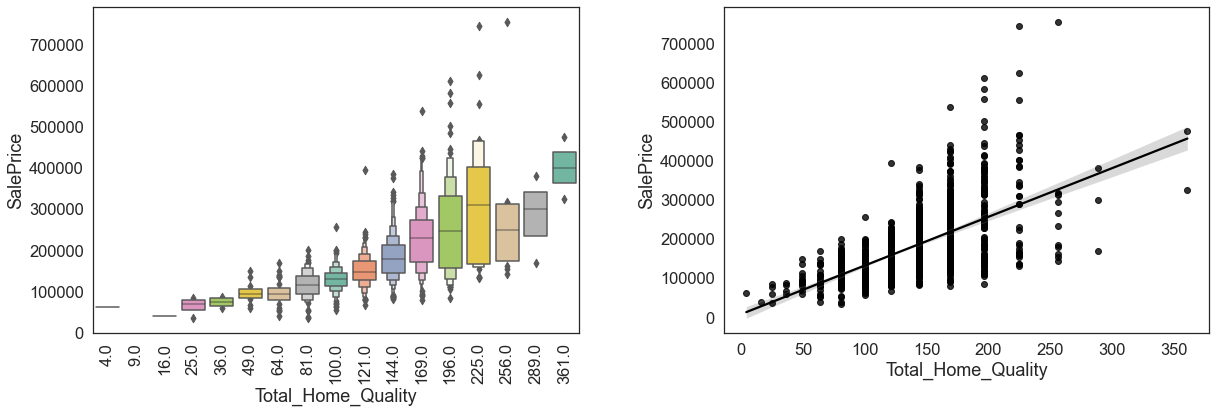

In [66]:
house_df['Total_Home_Quality'] = (house_df['OverallQual'] + house_df['OverallCond'])**2
plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
sns.boxenplot(data=house_df, x='Total_Home_Quality',y='SalePrice',palette='Set2')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.regplot(data=house_df, x='Total_Home_Quality',y='SalePrice',color='black')


## Question 2: Is the total number of bathrooms correlated with the sale price?

<AxesSubplot:xlabel='Total_Bathrooms', ylabel='SalePrice'>

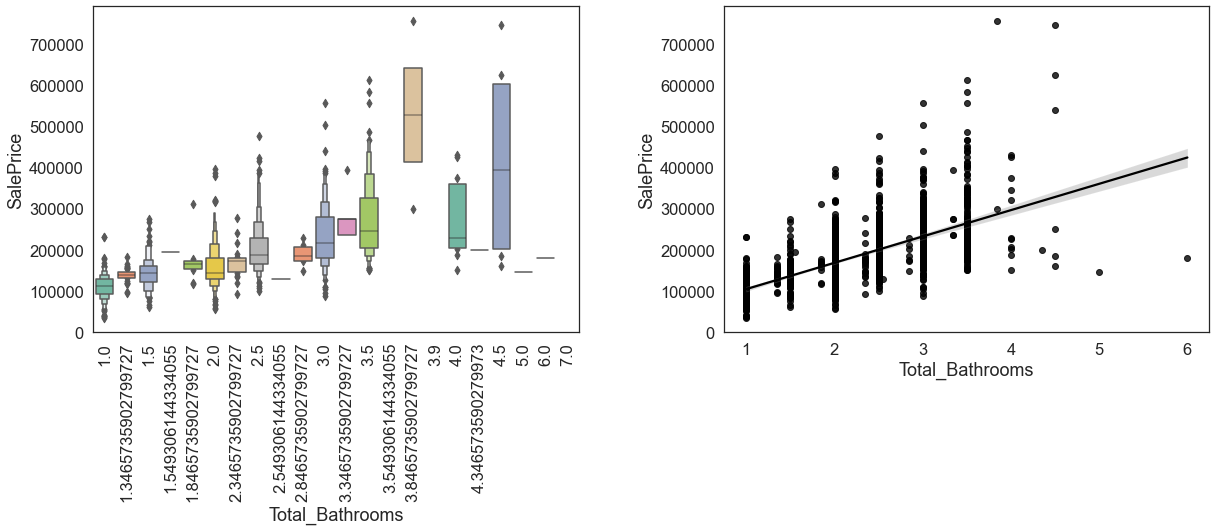

In [67]:
house_df['Total_Bathrooms'] = (house_df['FullBath'] + (0.5 * house_df['HalfBath']) + (house_df['BsmtFullBath'] + (0.5 * house_df['BsmtHalfBath'])))
plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
sns.boxenplot(data=house_df, x='Total_Bathrooms',y='SalePrice',palette='Set2')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.regplot(data=house_df, x='Total_Bathrooms',y='SalePrice',color='black')

## Question 3: Can Total Condition Affect Sale Price?

In [ ]:
house_df['total_condition'] = house_df['Condition1'] + house_df['Condition2'] 
plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
sns.boxenplot(data=house_df, x='total_condition',y='SalePrice',palette='Set2')
plt.subplot(1,2,2)
sns.regplot(data=house_df, x='total_condition',y='SalePrice',color='black')

## Question 4: Can area per room affect the sale price?

In [ ]:
house_df["SqFtPerRoom"] = house_df["GrLivArea"] / (house_df["TotRmsAbvGrd"] +
                                                       house_df["FullBath"] +
                                                       house_df["HalfBath"] +
                                                       house_df["KitchenAbvGr"])
plt.figure(figsize=(8,8))
sns.regplot(data=house_df, x='SqFtPerRoom',y='SalePrice',color='blue')

If we ask a good question and generate good derivatives from it, we will train our model further. 

**However, I'm not a real estate agent, and I'm not very knowledgeable about it.**

---------------------------------------------------------------------------------------
# Checking Dataset before Modeling

## Missing values

<AxesSubplot:>

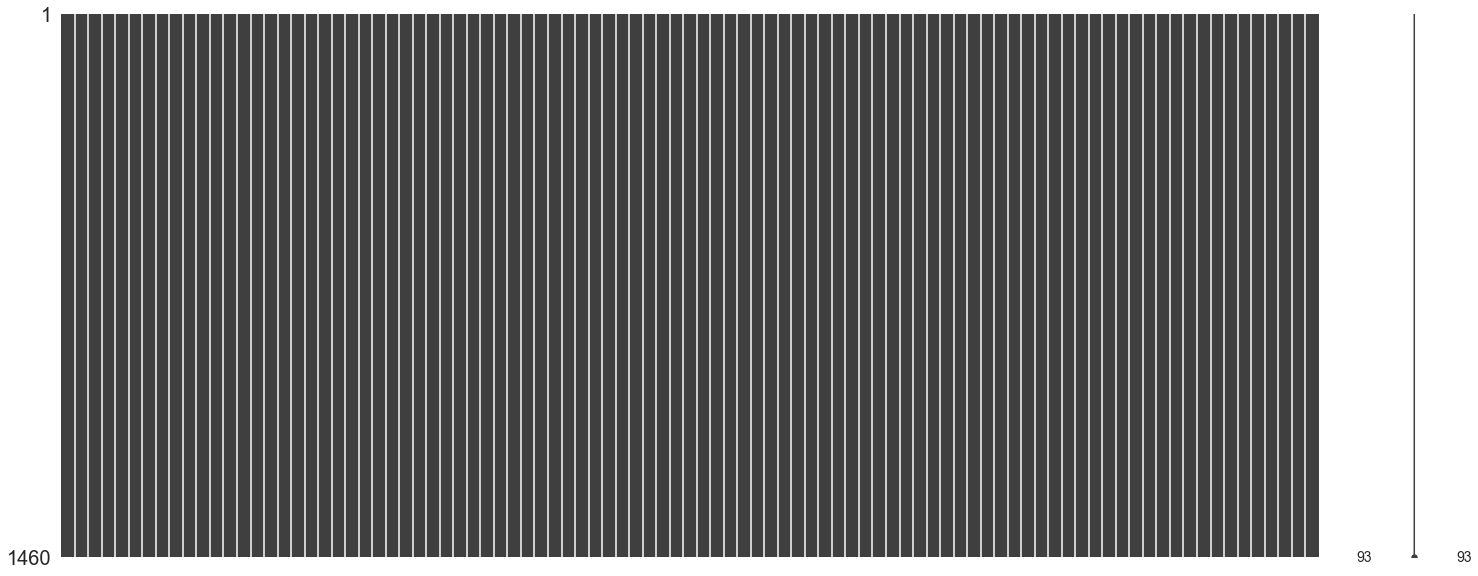

In [68]:
import missingno as msno
msno.matrix(house_df[tr_idx])

## Selecting Features

In [ ]:
corr=house_df.corr().round(1)
sns.set(font_scale=1)
plt.figure(figsize=(10, 15))
sns.set_style("white")
sns.set_palette("bright")
abs(corr['SalePrice']).sort_values()[:-1].plot.barh()
plt.gca().set_facecolor('#FFFFFF')
plt.title('Correlation with SalePrice',fontsize=20)

<span style="color:Blue"> Observation:

* The newly created derivative variable AllArea feature and house price have a high correlation!
* Pool-related features and fireplaces with many missing values have a low correlation with house price. 


In [ ]:
abs_corr = abs(corr['SalePrice']).sort_values()[:-1]
low_corr_list = abs_corr[abs_corr.values == 0].index
house_df.drop(low_corr_list, axis=1,inplace=True)

Let's remove features that have a correlation coefficient of 0 with the sale price!

## Encoding nominal data using one-hot encoding.

In [70]:
house_df = pd.get_dummies(house_df, drop_first=True)
house_df.head()

,MSZoning,LotFrontage,LotArea,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4,4.189655,9.042040,2,2,6,7.0,5.0,2003.0,2003.0,...,0,0,0,0,1,0,0,0,1,0
1,4,4.394449,9.169623,1,2,5,6.0,8.0,1976.0,1976.0,...,0,0,0,0,1,0,0,0,1,0
2,4,4.234107,9.328212,2,2,6,7.0,5.0,2001.0,2002.0,...,0,0,0,0,1,0,0,0,1,0
3,4,4.110874,9.164401,2,2,6,7.0,5.0,1915.0,1970.0,...,0,0,0,0,1,0,0,0,0,0
4,4,4.442651,9.565284,2,2,6,8.0,5.0,2000.0,2000.0,...,0,0,0,0,1,0,0,0,1,0


## Encoding Target using Log Scaling

In [ ]:
house_df['SalePriceCpy'] = np.log1p(house_df['SalePrice'])
house_df.drop('SalePrice',axis=1,inplace=True)
house_df['SalePrice'] = house_df['SalePriceCpy'].copy()
house_df.drop('SalePriceCpy',axis=1,inplace=True)

In [ ]:
house_train_x = house_df.drop('SalePrice',axis=1)
all_cols = [cname for cname in house_train_x.columns]
house_train_y = house_df['SalePrice']

--------------------------------------------------------
## Visualizing Training Dataset after Dimension Reduction

The preprocessed training dataset is 202 dimensions. After reducing the dimensions to 2D and 3D, let's check the distribution for each price.

### Plotting after dimensionality reduction to 2D

In [ ]:
import umap
import umap.plot
mapper = umap.UMAP().fit(house_train_x[tr_idx])
umap.plot.points(mapper, labels=house_train_y[tr_idx].round(1), theme='fire')

### Plotting after dimensionality reduction to 3D

In [ ]:
import plotly
import plotly.express as px
from umap import UMAP

umap_3d = UMAP(n_components=3, init='random', random_state=0)
x_umap = umap_3d.fit_transform(house_train_x[tr_idx])
umap_df = pd.DataFrame(x_umap)
train_y_sr = pd.Series(house_train_y[tr_idx],name='price')
print(type(x_umap))
new_df = pd.concat([umap_df,train_y_sr],axis=1)
fig = px.scatter_3d(
    new_df, x=0, y=1, z=2,
    color='price', labels={'color': 'number'}
)
fig.update_traces(marker_size=1.5)
fig.show()

Even looking at the 3D scaled-down picture, it is difficult to observe the special rules. If we look at it in 202 dimensions, I don't know if there is a possibility of finding any regularity.
Now, all we can do is create a good model and make the model learn well.

----------------------------------------------------------------------------
# Ensemble

![](https://media3.giphy.com/media/26xBvMWzk7FQr54Sk/giphy.gif)

Picture Credit: https://media3.giphy.com

## Seting up

In [ ]:
from pycaret.regression import *

In [ ]:
reg = setup(data = house_df[tr_idx],
            target = 'SalePrice',
            normalize = False,
            preprocess = False,
            numeric_features = all_cols,
            silent = True)

# Creating Models

In [ ]:
catboost = create_model('catboost')
br = create_model('br')
ridge = create_model('ridge')
gbr = create_model('gbr')
lightgbm = create_model('lightgbm')

# Tuning Hyperparameters

In [ ]:
tuned_catboost = tune_model(catboost,early_stopping=True,optimize='RMSE',search_library='optuna')

In [ ]:
tuned_br = tune_model(br,early_stopping=True,optimize='RMSE',search_library='optuna')

In [ ]:
tuned_gbr = tune_model(gbr,early_stopping=True,optimize='RMSE',search_library='optuna')

In [ ]:
tuned_ridge = tune_model(ridge,early_stopping=True,optimize='RMSE',search_library='optuna')

In [ ]:
tuned_lightgbm = tune_model(lightgbm,early_stopping=True,optimize='RMSE',search_library='optuna')

# Interpreting Models

In [ ]:
interpret_model(tuned_catboost)

In [ ]:
interpret_model(tuned_lightgbm)

<span style="color:Blue"> Observation:

* Newly created derived variables play an important role in model learning.
* When the models are different, the feature importance is also slightly different. This diversity is the power of ensemble. 

----------------------------------------------------------------------
# Stacking

In [ ]:
stacking = stack_models(estimator_list = [catboost,br,ridge,gbr,lightgbm],
                           meta_model = catboost,
                           optimize = 'RMSE')

## Evaluating Models
> In statistics, the coefficient of determination, also spelled coëfficient, denoted R2 or r2 and pronounced "R squared", is the proportion of the variation in the dependent variable that is predictable from the independent variable(s).
> 
> It is a statistic used in the context of statistical models whose main purpose is either the prediction of future outcomes or the testing of hypotheses, on the basis of other related information. It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model

Ref: https://en.wikipedia.org/wiki/Coefficient_of_determination

In [ ]:
plot_model(stacking, plot='residuals')

In [ ]:
plot_model(stacking, plot='error')

-------------------------------------------------------------------------------
# Blending

In [ ]:
blend_soft = blend_models(estimator_list = [catboost,br,ridge,gbr,lightgbm], 
                          #weights = [0.4,0.3,0.2,0.1], 
                          optimize = 'RMSE')

## Evaluating Models
> In statistics, the coefficient of determination, also spelled coëfficient, denoted R2 or r2 and pronounced "R squared", is the proportion of the variation in the dependent variable that is predictable from the independent variable(s).
> 
> It is a statistic used in the context of statistical models whose main purpose is either the prediction of future outcomes or the testing of hypotheses, on the basis of other related information. It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model

Ref: https://en.wikipedia.org/wiki/Coefficient_of_determination

In [ ]:
plot_model(blend_soft, plot='residuals')

In [ ]:
plot_model(blend_soft, plot='error')

------------------------------------
# Finalizing the last model
> This function trains a given estimator on the entire dataset including the holdout set.

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.html

In [ ]:
final_model = finalize_model(blend_soft)

The blend model seems to be stable. Let's use this model as our final model.

-------------------------------------------
# Submitting Result

We trained by taking the logarithm of the target values. Therefore, since predicted values ​​are also in the logarithm state, they take the process of converting back to actual values ​​through the exponential function.

In [ ]:
X_test_df = house_df[~tr_idx].drop('SalePrice',axis=1)
preds_test = final_model.predict(X_test_df)
submission_data.loc[:,'SalePrice'] = np.expm1(preds_test)
submission_data.to_csv('submission.csv', index=False)